<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Aplicaciones del Procesamiento de Lenguaje Natural</center></span>

<center>Prática: Evaluación Automática de Textos</center>
<br></br>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Referencias</span>

1. [Aprendizaje Profundo-Diplomado](https://github.com/AprendizajeProfundo/Diplomado)
1. [Aprendizaje Profundo-PLN](https://github.com/AprendizajeProfundo/PLN)
1. Varios, [Dive into deep learning](https://d2l.ai/), enero 2021

## <span style="color:blue">Contenido</span>

- [**Obtención de Datos**](#Obtención-de-Datos)

- [**Pre-procesamiento**](#Pre-procesamiento)

- [**Análisis Descriptivo**](#Análisis-Descriptivo)

- [**Extracción de Variables**](#Extracción-de-Variables)

- [**Aprendizaje No Supervisado**](#Aprendizaje-No-Supervisado)

- [**Aprendizaje Supervisado**](#Aprendizaje-Supervisado)

## <span style="color:blue">Obtención de Datos</span>

El conjunto completo de datos que usaremos para esta práctica son bastantes conocidos y se pueden encontrar aquí:

[The Hewlett Foundation: Automated Essay Scoring](https://www.kaggle.com/c/asap-aes/data)

Por algunos detalles técnicos, fue necesario hacer unos ajustes a los datos, por lo que usaremos los datos depurados a continuación:

In [30]:
# Librería para manejo de datos
import pandas as pd
# Progress bar
from tqdm import tqdm
# Progress bar for pandas
tqdm.pandas()
# Datos de ensayos
datos = pd.read_excel("../Datos/ASAP_Data/training_set_rel3.xls",usecols=['essay_id', 'essay_set', 'essay','domain1_score','domain2_score'])

# Folders for Output
import os

os.makedirs('../Datos/Clean_Data/',exist_ok=True)
os.makedirs('../Datos/Model_Data/',exist_ok=True)
os.makedirs('../Datos/Model_Data/Embedding',exist_ok=True)

**Veamos los datos:**

In [23]:
datos

,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,NaN
...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35,NaN
12974,21628,8,I never understood the meaning laughter is th...,32,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN
12976,21630,8,Trippin' on fen...,40,NaN


In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   essay_id       12978 non-null  int64  
 1   essay_set      12978 non-null  int64  
 2   essay          12978 non-null  object 
 3   domain1_score  12978 non-null  int64  
 4   domain2_score  1800 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 507.1+ KB


**<center>Veamos una fila en específico</center>**

In [25]:
datos.iloc[[0]]

,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN


**<center>Un ensayo en específico, sería</center>**

In [26]:
print(datos.iloc[0]['essay'])

Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy

**Veamos también, una descripción de los datos:**

**<center>¿Qué es un dominio?</center>**

[[Volver]](#Contenido)

## Pre-procesamiento

In [12]:
# !pip install language_tool_python

In [18]:
# Importar librería de chequeo de lenguaje
import language_tool_python
import datetime

In [19]:
tool = language_tool_python.LanguageTool('en-US')

Unzipping /var/folders/d_/hfs18jf54371qfmf54zq289c0000gn/T/tmprc5g3pdg.zip to /Users/moury/.cache/language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /Users/moury/.cache/language_tool_python.


In [27]:
l = tool.check(datos['essay'][0])
c = language_tool_python.utils.correct(datos['essay'][0], l)

for cor in l:
    print(cor)
print("\nCuántos errores:",len(l))
print("\nEnsayo corregido:\n\n",c)

Offset 218, length 6, Rule ID: MORFOLOGIK_RULE_EN_US
Message: Possible spelling mistake found.
Suggestion: trouble; treble
...he globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How wo...
                                           ^^^^^^
Offset 239, length 4, Rule ID: EN_CONTRACTION_SPELLING
Message: Possible spelling mistake found.
Suggestion: Don't
...nd keeps us out of troble! Thing about! Dont you think so? How would you feel if you...
                                           ^^^^
Offset 338, length 4, Rule ID: EVERY_EVER
Message: Did you mean “every”?
Suggestion: every
...lways on the phone with friends! Do you ever time to chat with your friends or buisn...
                                           ^^^^
Offset 377, length 8, Rule ID: MORFOLOGIK_RULE_EN_US
Message: Possible spelling mistake found.
Suggestion: business
... ever time to chat with your friends or buisness partner about things. Well now - there'...
                                       

In [31]:
datos['matches'] = datos['essay'].progress_apply(lambda txt: tool.check(txt))
datos['num_corrections'] = datos.progress_apply(lambda l: len(l['matches']), axis=1)
datos['corrected'] = datos.progress_apply(lambda l: language_tool_python.utils.correct(l['essay'], l['matches']), axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12978/12978 [00:00<00:00, 33859.73it/s]


### Compute new domain1_score for essayset 2

Porque hay dos dominios calificados.

In [33]:
data_sum = datos[['domain1_score','domain2_score']]
data_sum

,domain1_score,domain2_score
0,8,NaN
1,9,NaN
2,7,NaN
3,10,NaN
4,8,NaN
...,...,...
12973,35,NaN
12974,32,NaN
12975,40,NaN
12976,40,NaN


In [34]:
data_sum['domain2_score'].fillna(0.0, inplace=True)

/var/folders/d_/hfs18jf54371qfmf54zq289c0000gn/T/ipykernel_18381/4020683489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sum['domain2_score'].fillna(0.0, inplace=True)


In [35]:
data_sum['score'] = data_sum['domain1_score'] + data_sum['domain2_score']
data_sum[data_sum['domain2_score']!=0.0]

/var/folders/d_/hfs18jf54371qfmf54zq289c0000gn/T/ipykernel_18381/4167983265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sum['score'] = data_sum['domain1_score'] + data_sum['domain2_score']


,domain1_score,domain2_score,score
1783,4,4.0,8.0
1784,1,1.0,2.0
1785,2,3.0,5.0
1786,4,4.0,8.0
1787,4,4.0,8.0
...,...,...,...
3578,3,3.0,6.0
3579,3,3.0,6.0
3580,2,2.0,4.0
3581,3,4.0,7.0


In [36]:
datos['score'] = data_sum['score']
datos[datos['essay_set']==2]

,essay_id,essay_set,essay,domain1_score,domain2_score,matches,num_corrections,corrected,score
1783,2978,2,Certain materials being removed from libraries...,4,4.0,"[Offset 190, length 4, Rule ID: WHITESPACE_RUL...",13,Certain materials being removed from libraries...,8.0
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1,1.0,"[Offset 136, length 1, Rule ID: I_LOWERCASE\nM...",27,Write a persuasive essay to a newspaper reflec...,2.0
1785,2980,2,Do you think that libraries should remove cert...,2,3.0,"[Offset 99, length 7, Rule ID: MORFOLOGIK_RULE...",14,Do you think that libraries should remove cert...,5.0
1786,2981,2,"In @DATE1's world, there are many things found...",4,4.0,"[Offset 389, length 11, Rule ID: MORFOLOGIK_RU...",7,"In @DATE1's world, there are many things found...",8.0
1787,2982,2,In life you have the 'offensive things'. The l...,4,4.0,"[Offset 3, length 4, Rule ID: MISSING_COMMA_AF...",38,"In life, you have the 'offensive things'. The ...",8.0
...,...,...,...,...,...,...,...,...,...
3578,4773,2,The author is writting about taking books off ...,3,3.0,"[Offset 14, length 8, Rule ID: MORFOLOGIK_RULE...",24,The author is writing about taking books off t...,6.0
3579,4774,2,"I do not think that materials, such as books, ...",3,3.0,"[Offset 188, length 7, Rule ID: MORFOLOGIK_RUL...",17,"I do not think that materials, such as books, ...",6.0
3580,4775,2,"Yes we should keep the books,music,movies,an m...",2,2.0,"[Offset 28, length 6, Rule ID: COMMA_PARENTHES...",18,"Yes we should keep the books, music,movies,an ...",4.0
3581,4776,2,"I do believe that book, magazines, music, mov...",3,4.0,"[Offset 17, length 2, Rule ID: WHITESPACE_RULE...",33,"I do believe that book, magazines, music, movi...",7.0


In [37]:
datos.to_pickle('../Datos/Clean_Data/Data_Corrected.pkl')

In [40]:
# Librería para manejo de datos
import pandas as pd
# Progress bar
from tqdm import tqdm
# Progress bar for pandas
tqdm.pandas()
datos = pd.read_pickle('../Datos/Clean_Data/Data_Corrected.pkl')

In [ ]:
#!python -m spacy download 'en_core_web_lg'

In [ ]:
sents = []
tokens = []
lemma = []
pos = []
ner = []

import spacy
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = set(STOP_WORDS)
# stop_words.update(punctuation) # remove it if you need punctuation 

#spacy.prefer_gpu()
nlp = spacy.load('en_core_web_lg')

# suppress numpy warnings
np.warnings.filterwarnings('ignore')

for essay in tqdm(nlp.pipe(datos['corrected'], batch_size=100, n_process=8)):
    if essay.is_parsed:
        tokens.append([e.text for e in essay])
        sents.append([sent.text.strip() for sent in essay.sents])
        pos.append([e.pos_ for e in essay])
        ner.append([e.text for e in essay.ents])
        lemma.append([n.lemma_ for n in essay])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)
        sents.append(None)
        ner.append(None)

datos['tokens'] = tokens
datos['lemma'] = lemma
datos['pos'] = pos
datos['sents'] = sents
datos['ner'] = ner

In [53]:
datos = datos[['essay_id', 'essay_set', 'essay', 'matches','corrected','sents','tokens', 'lemma',
       'pos', 'ner','domain1_score', 'domain2_score', 'score','num_corrections']]
datos.head()

,essay_id,essay_set,essay,matches,corrected,sents,tokens,lemma,pos,ner,domain1_score,domain2_score,score,num_corrections
0,1,1,"Dear local newspaper, I think effects computer...","[Offset 218, length 6, Rule ID: MORFOLOGIK_RUL...","Dear local newspaper, I think effects computer...","[Dear local newspaper, I think effects compute...","[Dear, local, newspaper, ,, I, think, effects,...","[dear, local, newspaper, ,, I, think, effect, ...","[ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...","[@CAPS1, Facebook, MySpace]",8,NaN,8.0,16
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[Offset 148, length 8, Rule ID: MORFOLOGIK_RUL...","Dear @CAPS1 @CAPS2, I believe that using compu...","[Dear @CAPS1, @CAPS2, I believe that using com...","[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...","[dear, @CAPS1, @caps2, ,, I, believe, that, us...","[ADJ, PROPN, ADV, PUNCT, PRON, VERB, SCONJ, VE...","[MySpace, millions, one, MySpace, Facebook, mi...",9,NaN,9.0,25
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Offset 315, length 4, Rule ID: MORFOLOGIK_RUL...","Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...","[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[ADJ, PUNCT, PROPN, PROPN, PROPN, ADJ, CCONJ, ...","[@CAPS4, one]",7,NaN,7.0,17
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...","[Offset 86, length 7, Rule ID: MORFOLOGIK_RULE...","Dear Local Newspaper, @CAPS1 I have found that...","[Dear Local Newspaper,, @CAPS1 I have found th...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[PROPN, PROPN, PROPN, PUNCT, PROPN, PRON, AUX,...","[Dear Local Newspaper, @CAPS1, Newspaper, @CAP...",10,NaN,10.0,29
4,5,1,"Dear @LOCATION1, I know having computers has a...","[Offset 177, length 8, Rule ID: MORFOLOGIK_RUL...","Dear @LOCATION1, I know having computers has a...","[Dear @LOCATION1, I know having computers has ...","[Dear, @LOCATION1, ,, I, know, having, compute...","[Dear, @LOCATION1, ,, I, know, have, computer,...","[PROPN, PROPN, PUNCT, PRON, VERB, VERB, NOUN, ...","[First, one, Secondly, one, vacations, @CAPS1]",8,NaN,8.0,17


In [54]:
datos['token_count'] = datos.apply(lambda x: len(x['tokens']), axis=1)
datos['unique_token_count'] = datos.apply(lambda x: len(set(x['tokens'])), axis=1)
datos['nostop_count'] = datos.apply(lambda x: len([token for token in x['tokens'] if token not in stop_words]), axis=1)
datos['sent_count'] = datos.apply(lambda x: len(x['sents']), axis=1)
datos['ner_count'] = datos.apply(lambda x: len(x['ner']), axis=1)
datos['comma'] = datos.apply(lambda x: x['corrected'].count(','), axis=1)
datos['question'] = datos.apply(lambda x: x['corrected'].count('?'), axis=1)
datos['exclamation'] = datos.apply(lambda x: x['corrected'].count('!'), axis=1)
datos['quotation'] = datos.apply(lambda x: x['corrected'].count('"') + x['corrected'].count("'"), axis=1)
datos['organization'] = datos.apply(lambda x: x['corrected'].count(r'@ORGANIZATION'), axis=1)
datos['caps'] = datos.apply(lambda x: x['corrected'].count(r'@CAPS'), axis=1)
datos['person'] = datos.apply(lambda x: x['corrected'].count(r'@PERSON'), axis=1)
datos['location'] = datos.apply(lambda x: x['corrected'].count(r'@LOCATION'), axis=1)
datos['money'] = datos.apply(lambda x: x['corrected'].count(r'@MONEY'), axis=1)
datos['time'] = datos.apply(lambda x: x['corrected'].count(r'@TIME'), axis=1)
datos['date'] = datos.apply(lambda x: x['corrected'].count(r'@DATE'), axis=1)
datos['percent'] = datos.apply(lambda x: x['corrected'].count(r'@PERCENT'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['adj'] = datos.apply(lambda x: x['pos'].count('ADJ'), axis=1)
datos['pron'] = datos.apply(lambda x: x['pos'].count('PRON'), axis=1)
datos['verb'] = datos.apply(lambda x: x['pos'].count('VERB'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['cconj'] = datos.apply(lambda x: x['pos'].count('CCONJ'), axis=1)
datos['adv'] = datos.apply(lambda x: x['pos'].count('ADV'), axis=1)
datos['det'] = datos.apply(lambda x: x['pos'].count('DET'), axis=1)
datos['propn'] = datos.apply(lambda x: x['pos'].count('PROPN'), axis=1)
datos['num'] = datos.apply(lambda x: x['pos'].count('NUM'), axis=1)
datos['part'] = datos.apply(lambda x: x['pos'].count('PART'), axis=1)
datos['intj'] = datos.apply(lambda x: x['pos'].count('INTJ'), axis=1)

datos.to_pickle('../Datos/Clean_Data/Data_Corrected_Features.pkl')

In [73]:
datos = pd.read_pickle('../Datos/Clean_Data/Data_Corrected_Features.pkl')
pd.set_option('display.max_columns',42)
datos.head(3)

,essay_id,essay_set,essay,matches,corrected,sents,tokens,lemma,pos,ner,domain1_score,domain2_score,score,num_corrections,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,quotation,organization,caps,person,location,money,time,date,percent,noun,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...","[Offset 218, length 6, Rule ID: MORFOLOGIK_RUL...","Dear local newspaper, I think effects computer...","[Dear local newspaper, I think effects compute...","[Dear, local, newspaper, ,, I, think, effects,...","[dear, local, newspaper, ,, I, think, effect, ...","[ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...","[@CAPS1, Facebook, MySpace]",8,NaN,8.0,16,395,180,203,16,2,18,3,4,7,2,2,0,0,0,0,1,0,76,19,48,51,14,14,21,6,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[Offset 148, length 8, Rule ID: MORFOLOGIK_RUL...","Dear @CAPS1 @CAPS2, I believe that using compu...","[Dear @CAPS1, @CAPS2, I believe that using com...","[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...","[dear, @CAPS1, @caps2, ,, I, believe, that, us...","[ADJ, PROPN, ADV, PUNCT, PRON, VERB, SCONJ, VE...","[MySpace, millions, one, MySpace, Facebook, mi...",9,NaN,9.0,25,459,206,240,21,9,16,3,1,5,0,2,0,3,0,0,0,0,95,19,52,72,18,19,29,8,5,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Offset 315, length 4, Rule ID: MORFOLOGIK_RUL...","Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...","[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[ADJ, PUNCT, PROPN, PROPN, PROPN, ADJ, CCONJ, ...","[@CAPS4, one]",7,NaN,7.0,17,311,163,158,14,2,13,0,0,5,1,5,0,0,0,0,0,0,72,18,27,39,16,11,26,4,3,10,0


In [67]:
datos['tokens']

0        [Dear, local, newspaper, ,, I, think, effects,...
1        [Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...
2        [Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...
3        [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...
4        [Dear, @LOCATION1, ,, I, know, having, compute...
                               ...                        
12973    [ , In, most, stories, mothers, and, daughters...
12974    [ , I, never, understood, the, meaning, laught...
12975    [When, you, laugh, ,, is, @CAPS5, out, of, hab...
12976    [ , Trippin, ', on, fences, I, am, @NUM1, year...
12977    [ , Many, people, believe, that, laughter, can...
Name: tokens, Length: 12978, dtype: object

In [68]:
datos['lemma']

0        [dear, local, newspaper, ,, I, think, effect, ...
1        [dear, @CAPS1, @caps2, ,, I, believe, that, us...
2        [dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...
3        [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...
4        [Dear, @LOCATION1, ,, I, know, have, computer,...
                               ...                        
12973    [ , in, most, story, mother, and, daughter, be...
12974    [ , I, never, understand, the, meaning, laught...
12975    [when, you, laugh, ,, be, @CAPS5, out, of, hab...
12976    [ , Trippin, ', on, fence, I, be, @num1, year,...
12977    [ , many, people, believe, that, laughter, can...
Name: lemma, Length: 12978, dtype: object

In [69]:
datos['ner']

0                              [@CAPS1, Facebook, MySpace]
1        [MySpace, millions, one, MySpace, Facebook, mi...
2                                            [@CAPS4, one]
3        [Dear Local Newspaper, @CAPS1, Newspaper, @CAP...
4           [First, one, Secondly, one, vacations, @CAPS1]
                               ...                        
12973    [one, sixteen, forty, Approximately seven mont...
12974    [two, this day, about an hour, a half an hour,...
12975    [@CAPS1, one, two, four, @CAPS1, our days, Thi...
12976    [Laughter is the shortest distance, two, the d...
12977    [daily, @CAPS1, @CAPS1, @ORGANIZATION1, @CAPS1...
Name: ner, Length: 12978, dtype: object

## Análisis Descriptivo

### Selecciona columnas de interés, renombra columna de ensayos y divide el target_score entre 10

In [74]:
column_names = ['essay_id', 'essay_set','corrected', 'score', 'tokens',
                'num_corrections', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj']

In [75]:
datos = datos[column_names]

datos['score'] = datos['score']/10

In [76]:
datos

,essay_id,essay_set,corrected,score,tokens,num_corrections,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,quotation,organization,caps,person,location,money,time,date,percent,noun,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",0.8,"[Dear, local, newspaper, ,, I, think, effects,...",16,395,180,203,16,2,18,3,4,7,2,2,0,0,0,0,1,0,76,19,48,51,14,14,21,6,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.9,"[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",25,459,206,240,21,9,16,3,1,5,0,2,0,3,0,0,0,0,95,19,52,72,18,19,29,8,5,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.7,"[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",17,311,163,158,14,2,13,0,0,5,1,5,0,0,0,0,0,0,72,18,27,39,16,11,26,4,3,10,0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",1.0,"[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",29,577,264,331,30,6,14,1,2,6,4,20,3,3,0,0,0,8,136,42,32,73,17,22,43,32,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.8,"[Dear, @LOCATION1, ,, I, know, having, compute...",17,519,209,251,30,6,15,0,0,6,0,1,0,2,0,0,0,0,107,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3.5,"[ , In, most, stories, mothers, and, daughters...",20,964,345,459,35,20,60,0,0,29,0,45,4,6,0,0,0,0,124,46,151,129,55,64,51,33,13,23,4
12974,21628,8,I never understood the meaning laughter is th...,3.2,"[ , I, never, understood, the, meaning, laught...",33,646,229,335,44,15,24,10,0,23,0,18,10,0,0,0,0,0,101,36,82,77,26,52,48,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",4.0,"[When, you, laugh, ,, is, @CAPS5, out, of, hab...",13,953,381,512,44,16,48,7,9,22,0,27,25,4,0,0,1,0,138,37,107,121,37,51,75,53,5,21,1
12976,21630,8,"Trippin' on fences I am @NUM1 years young, an...",4.0,"[ , Trippin, ', on, fences, I, am, @NUM1, year...",6,670,260,358,39,11,41,2,0,23,10,4,0,2,0,0,0,0,83,43,105,71,22,53,40,16,4,10,1


### Seleciona predictores

In [7]:
predictors = [  'num_corrections',
                'unique_token_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'organization',
                'caps',
                'person',
                'location',
                'money',
                'time',
                'date',
                'percent',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'det',
                'propn',
                'num',
                'part',
                'intj'
                ]

### Distribución de target_score y sumary de features

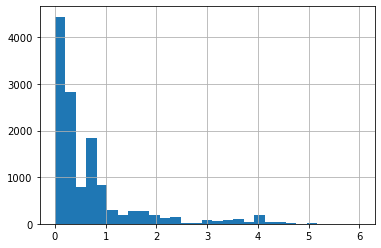

In [83]:
import matplotlib.pyplot as plt
datos['score'].hist(bins=29)
plt.savefig('../Imagenes/scores_distribution.png')
plt.show()

In [84]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
essay_id,12978.0,10295.432809,6308.588616,1.0,4439.25,10045.5,15680.75,21633.0
essay_set,12978.0,4.179458,2.136749,1.0,2.00,4.0,6.00,8.0
score,12978.0,0.726167,0.887966,0.0,0.20,0.3,0.80,6.0
num_corrections,12978.0,9.829172,10.164056,0.0,3.00,7.0,13.00,124.0
token_count,12978.0,252.074434,199.996053,2.0,110.00,185.0,349.00,1249.0
unique_token_count,12978.0,118.501464,70.487771,2.0,67.00,101.5,154.00,503.0
nostop_count,12978.0,130.512637,103.006915,2.0,57.00,99.0,176.00,738.0
sent_count,12978.0,13.441979,11.490342,1.0,6.00,9.0,19.00,105.0
ner_count,12978.0,4.184697,4.020774,0.0,1.00,3.0,6.00,49.0
comma,12978.0,8.881569,9.765064,0.0,2.00,6.0,12.00,75.0


### Crea archivo pickle

In [85]:
datos.to_pickle('../Datos/Model_Data/Model_Data.pkl')

## <span style="color:blue">Matriz de Correlación</span>

In [2]:
import pandas as pd
datos = pd.read_pickle('../Datos/Model_Data/Model_Data.pkl')

In [3]:
datos.columns

Index(['essay_id', 'essay_set', 'corrected', 'score', 'tokens',
       'num_corrections', 'token_count', 'unique_token_count', 'nostop_count',
       'sent_count', 'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person', 'location', 'money',
       'time', 'date', 'percent', 'noun', 'adj', 'pron', 'verb', 'cconj',
       'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [4]:
# selcciona variables

var_names = ['score', 'num_corrections', 'token_count',
       'unique_token_count', 'nostop_count', 'sent_count',
       'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent',
       'noun', 'adj', 'pron', 'verb', 'cconj', 'adv',
       'det', 'propn', 'num', 'part', 'intj']

variable = datos[var_names]

In [5]:
variable.shape

(12978, 30)

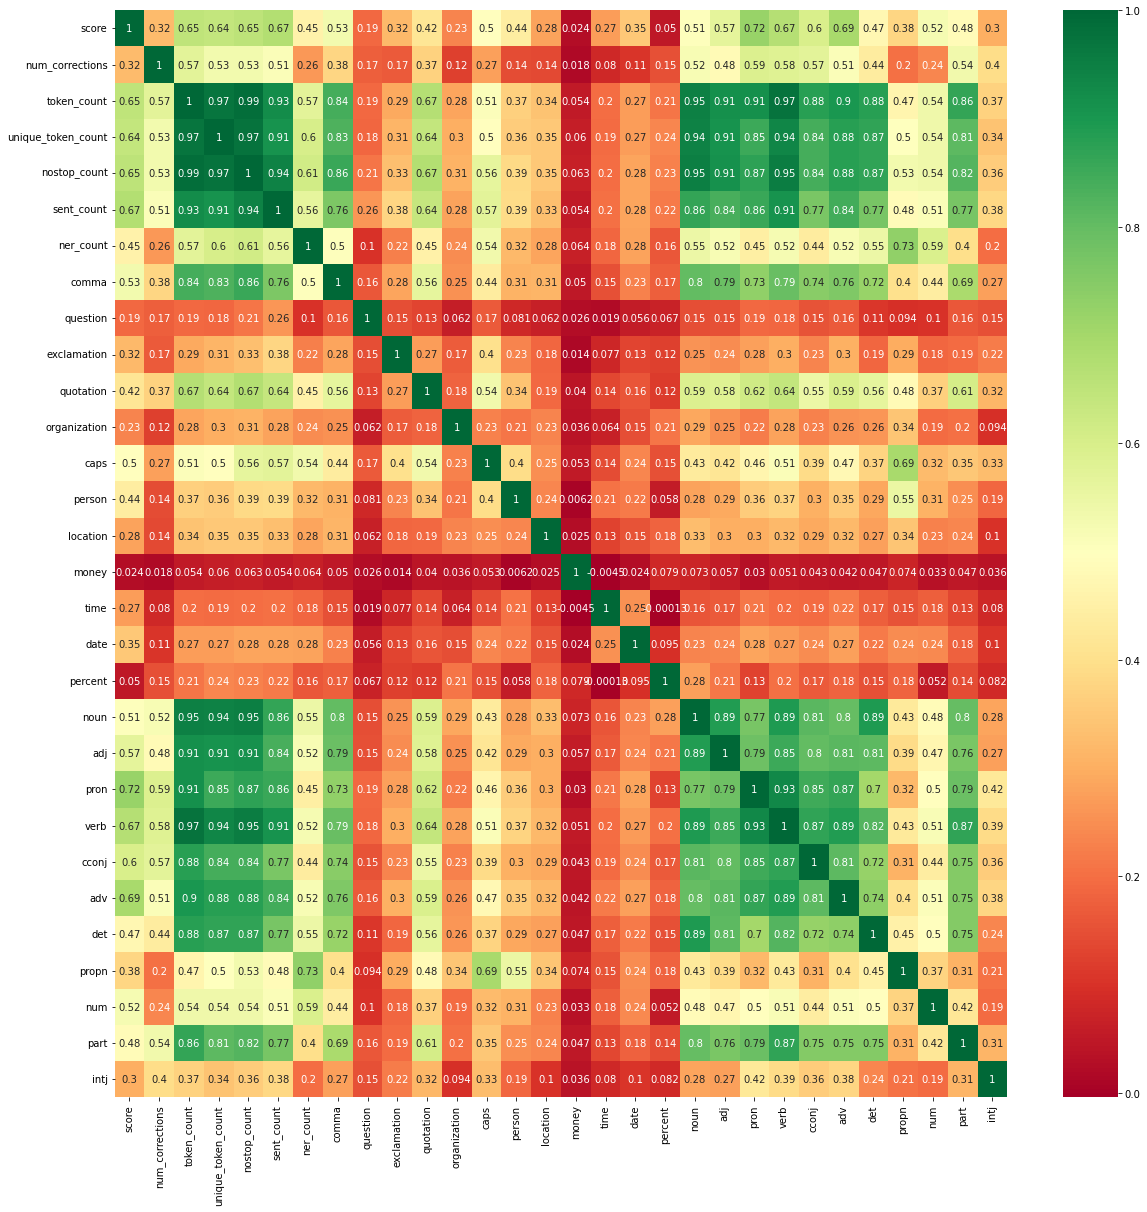

In [90]:
import seaborn as sns

corrmat = variable.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(variable[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('../Imagenes/correlation_matrix.png')

In [92]:
pd.options.display.max_rows = 100
corrmat[['score']].sort_values(by='score',ascending=False)

,score
score,1.000000
pron,0.718863
adv,0.691087
sent_count,0.673687
verb,0.668069
nostop_count,0.651751
token_count,0.648373
unique_token_count,0.639655
cconj,0.599422
adj,0.567422


### Estadisticas para seleccionar features

### Infromación mutua

In [10]:
from sklearn.feature_selection import  SelectKBest, f_regression, mutual_info_regression
import matplotlib.pyplot as plt
X = datos[predictors]
y = datos['score']
best_features= SelectKBest(score_func=mutual_info_regression,k=len(predictors))
fit=best_features.fit(X,y)

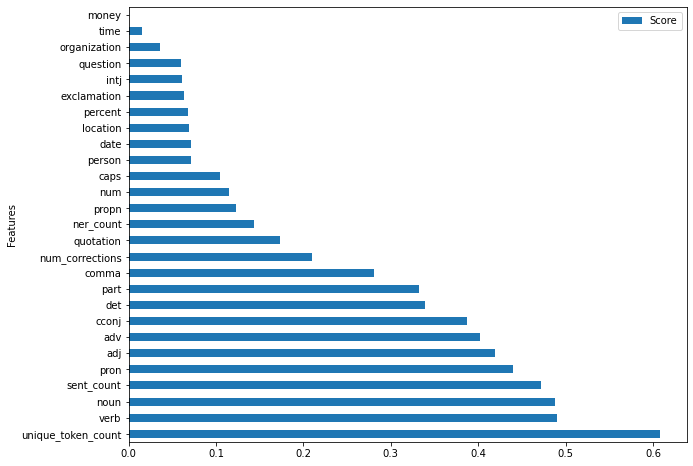

In [16]:
df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(len(predictors),'Score').plot(kind='barh',figsize=(10,8))
plt.savefig('../Imagenes/mutual_info.png')
plt.show()

### Regresión

In [100]:
best_features= SelectKBest(score_func=f_regression,k=len(predictors))
fit=best_features.fit(X,y)

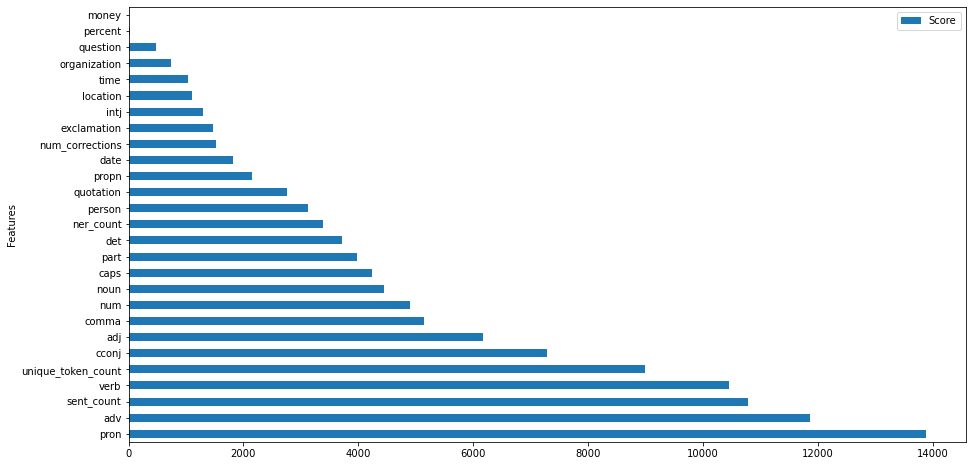

In [101]:
df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(len(predictors),'Score').plot(kind='barh',figsize=(15,8))
plt.show()

#### Guarda los textos de los ensayos corregido para el embedding

In [103]:
datos['corrected'].to_csv('../Datos/Model_Data/Essays.csv',index=False)

[[Volver]](#Contenido)

## Aprendizaje No Supervisado 

### Sumergimiento de los textos por palabra

In [105]:
# fasttext para generar Embeddings
import fasttext

### Crea el modelo de sumergimiento

In [106]:
ft_model = fasttext.train_unsupervised('../Datos/Model_Data/Essays.csv',dim=300,epoch=10,wordNgrams=2)

Read 2M words
Number of words:  15859
Number of labels: 0
Progress: 100.0% words/sec/thread:   50970 lr:  0.000000 avg.loss:  2.060434 ETA:   0h 0m 0s


In [107]:
ft_model.save_model('../Modelos/ft_essays_d_300_ep_10_ngram_2.bin')

##  Embedding de Palabras

In [108]:
import numpy as np

In [113]:
no_doc = np.random.randint(len(datos))

# Volcabulario del embedding
vocabulary = set(ft_model.words)

def doc_word_vectors(words, model, vocabulary, num_features):
    
    nwords = 0.
    no_found=[]
    doc=[]
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            doc.append(model.get_word_vector(word))
        else:
            no_found.append(word)
    
    
        
    return np.array(doc),no_found

emb0,no_found = doc_word_vectors(datos['tokens'].iloc[no_doc], model=ft_model, vocabulary=vocabulary, num_features=ft_model.dim)

print('Dimensión del Embedding:',emb0.shape)
print('\nPalabras no encontradas:\n\n',no_found)

Dimensión del Embedding: (178, 300)

Palabras no encontradas:

 ['n’t', 'mute', 'modernized']


## Embedding de Textos

### Promediar Palabras para Perfilar Ensayos 

In [84]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.get_word_vector(word))
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.words)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
ftext_feature_array = averaged_word_vectorizer(corpus=datos['tokens'], model=ft_model, num_features=ft_model.dim)

### Usar Vector de Sentencias para Perfilar Ensayos 

In [115]:
def averaged_word_vectorizer(corpus, model):
    features = [model.get_sentence_vector(sentence) for sentence in corpus]
    return np.array(features)

# get document level embeddings
ftext_feature_array = averaged_word_vectorizer(corpus=datos['corrected'], model=ft_model)

In [117]:
doc_embedding = pd.DataFrame(ftext_feature_array)
doc_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,...,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.010224,-0.038323,-0.027793,-0.024668,-0.005343,-0.008129,-0.025293,-0.013586,0.018538,-0.022885,0.006202,0.019602,-0.021145,0.013672,0.062371,0.011199,-0.060120,-0.036522,-0.017209,0.026375,0.020272,...,-0.013653,0.017335,0.026384,0.035861,-0.002364,0.012955,0.006526,-0.007392,-0.006638,0.006168,0.030464,-0.030964,0.023123,0.043834,0.018006,-0.002226,-0.002246,-0.026736,0.031609,-0.000006,-0.037783
1,-0.006333,-0.043431,-0.021787,-0.026094,0.009628,-0.007389,-0.028682,-0.011060,0.023295,-0.019511,-0.001253,0.007838,-0.018235,0.005340,0.056715,0.010822,-0.065381,-0.024820,-0.015569,0.026554,0.025643,...,-0.013196,0.013115,0.024312,0.035067,-0.006248,0.008506,0.005579,-0.000574,-0.005118,0.008329,0.024197,-0.024974,0.023997,0.041497,0.024633,-0.001861,-0.010875,-0.029118,0.030272,0.003863,-0.038842
2,-0.008260,-0.035998,-0.023476,-0.029862,0.010140,-0.016234,-0.025587,-0.023917,0.015748,-0.012901,0.010036,0.012023,-0.020719,0.011144,0.053269,0.015725,-0.059238,-0.023955,-0.009081,0.022486,0.025789,...,-0.016641,0.018035,0.020751,0.035790,0.001354,0.006542,0.006464,0.000353,-0.004121,0.011533,0.037808,-0.028837,0.018534,0.045696,0.011589,0.003216,-0.007365,-0.017180,0.029428,0.007896,-0.039955
3,-0.003679,-0.039250,-0.021738,-0.029681,0.020427,-0.008905,-0.031870,-0.009708,0.019779,-0.012563,0.003494,0.009170,-0.019302,0.009393,0.049382,0.012992,-0.062444,-0.025374,-0.015020,0.023546,0.026694,...,-0.024731,0.012891,0.016664,0.035000,0.002145,0.003638,0.009007,-0.005728,-0.009194,0.004335,0.029064,-0.023058,0.019847,0.050342,0.022466,0.002503,0.001259,-0.012824,0.026940,0.014261,-0.033281
4,-0.003671,-0.035160,-0.026918,-0.026073,0.006190,-0.009019,-0.035956,-0.008473,0.023383,-0.015215,0.010648,0.002772,-0.013283,0.009337,0.056904,0.016701,-0.069736,-0.031940,-0.018468,0.024266,0.024753,...,-0.016036,0.019111,0.025579,0.024135,0.008039,0.004061,0.008385,-0.002519,-0.014560,0.007812,0.040662,-0.026779,0.015716,0.040157,0.023867,0.004495,-0.005037,-0.028196,0.025671,0.013939,-0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.008794,-0.050452,-0.025216,-0.018447,0.008472,-0.013148,-0.034246,-0.010397,0.006626,-0.013421,-0.004935,0.012068,-0.017750,0.004968,0.045194,0.005687,-0.056454,-0.017199,-0.018413,0.017522,0.031026,...,-0.007167,-0.000601,0.027921,0.040902,-0.013324,0.009988,0.006156,0.012285,-0.003850,0.009809,0.028420,-0.024795,0.033274,0.049182,0.012787,0.006608,0.005025,-0.019304,0.017536,0.019247,-0.028178
12974,0.015489,-0.046033,-0.024427,-0.024349,0.010841,-0.007350,-0.029004,-0.010510,0.005568,-0.019352,-0.005033,0.020723,-0.016848,0.004614,0.044058,0.008879,-0.058388,-0.011913,-0.014488,0.019009,0.032645,...,-0.008265,0.004870,0.029120,0.045269,-0.010715,0.016256,0.008412,0.009424,-0.002591,0.003190,0.027788,-0.019599,0.033864,0.047702,0.019347,0.006006,-0.005485,-0.024577,0.016896,0.014662,-0.032809
12975,0.018171,-0.053933,-0.026774,-0.020874,0.007397,-0.011077,-0.035225,-0.012893,0.000974,-0.021037,-0.013148,0.018223,-0.021852,0.003901,0.042504,0.012318,-0.058770,-0.019460,-0.015084,0.023765,0.029131,...,-0.010132,0.009027,0.018755,0.044313,-0.008087,0.010185,0.011608,0.008940,0.002630,0.002403,0.028667,-0.021237,0.027104,0.048141,0.021645,0.001876,0.001000,-0.024729,0.017872,0.020158,-0.023729
12976,0.017284,-0.047639,-0.023452,-0.020738,0.011532,-0.011620,-0.046671,-0.012111,0.005687,-0.008826,-0.010921,0.024415,-0.024484,0.013900,0.051333,0.011563,-0.058971,-0.004865,-0.017749,0.022869,0.025379,...,-0.003035,-0.000849,0.018688,0.047859,-0.016537,0.011320,0.015833,0.011375,-0.000203,0.007135,0.028832,-0.015225,0.031379,0.042661,0.025063,-0.003220,0.004838,-0.019405,0.009934,0.013288,-0.021095


In [120]:
doc_embedding.to_csv(f'../Datos/Model_Data/Embedding/Doc_Embedding_{ft_model.get_dimension()}.csv',index=False)

In [123]:
doc_embedding = pd.read_csv('../Datos/Model_Data/Embedding/Doc_Embedding_300.csv')
doc_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,...,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.010224,-0.038323,-0.027793,-0.024668,-0.005343,-0.008129,-0.025293,-0.013586,0.018538,-0.022885,0.006202,0.019602,-0.021145,0.013672,0.062371,0.011199,-0.060120,-0.036522,-0.017209,0.026375,0.020272,...,-0.013653,0.017335,0.026384,0.035861,-0.002364,0.012955,0.006526,-0.007392,-0.006638,0.006168,0.030464,-0.030964,0.023123,0.043834,0.018006,-0.002226,-0.002246,-0.026736,0.031609,-0.000006,-0.037783
1,-0.006333,-0.043431,-0.021787,-0.026094,0.009628,-0.007389,-0.028682,-0.011060,0.023295,-0.019511,-0.001253,0.007838,-0.018235,0.005340,0.056715,0.010822,-0.065381,-0.024820,-0.015569,0.026554,0.025643,...,-0.013196,0.013115,0.024312,0.035067,-0.006248,0.008506,0.005579,-0.000574,-0.005118,0.008329,0.024197,-0.024974,0.023997,0.041497,0.024633,-0.001861,-0.010875,-0.029118,0.030272,0.003863,-0.038842
2,-0.008260,-0.035998,-0.023476,-0.029862,0.010140,-0.016234,-0.025587,-0.023917,0.015748,-0.012901,0.010036,0.012023,-0.020719,0.011144,0.053269,0.015725,-0.059238,-0.023955,-0.009081,0.022486,0.025789,...,-0.016641,0.018035,0.020751,0.035790,0.001354,0.006542,0.006464,0.000353,-0.004121,0.011533,0.037808,-0.028837,0.018534,0.045696,0.011589,0.003216,-0.007365,-0.017180,0.029428,0.007896,-0.039955
3,-0.003679,-0.039250,-0.021738,-0.029681,0.020427,-0.008905,-0.031870,-0.009708,0.019779,-0.012563,0.003494,0.009170,-0.019302,0.009393,0.049382,0.012992,-0.062444,-0.025374,-0.015020,0.023546,0.026694,...,-0.024731,0.012891,0.016664,0.035000,0.002145,0.003638,0.009007,-0.005728,-0.009194,0.004335,0.029064,-0.023058,0.019847,0.050342,0.022466,0.002503,0.001259,-0.012824,0.026940,0.014261,-0.033281
4,-0.003671,-0.035160,-0.026918,-0.026073,0.006190,-0.009019,-0.035956,-0.008473,0.023383,-0.015215,0.010648,0.002772,-0.013283,0.009337,0.056904,0.016701,-0.069736,-0.031940,-0.018468,0.024266,0.024753,...,-0.016036,0.019111,0.025579,0.024135,0.008039,0.004061,0.008385,-0.002519,-0.014560,0.007812,0.040662,-0.026779,0.015716,0.040157,0.023867,0.004495,-0.005037,-0.028196,0.025671,0.013939,-0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.008794,-0.050452,-0.025216,-0.018447,0.008472,-0.013148,-0.034246,-0.010397,0.006626,-0.013421,-0.004935,0.012068,-0.017750,0.004968,0.045194,0.005687,-0.056454,-0.017199,-0.018413,0.017522,0.031026,...,-0.007167,-0.000601,0.027921,0.040902,-0.013324,0.009988,0.006156,0.012285,-0.003850,0.009809,0.028420,-0.024795,0.033274,0.049182,0.012787,0.006608,0.005025,-0.019304,0.017536,0.019247,-0.028178
12974,0.015489,-0.046033,-0.024427,-0.024349,0.010841,-0.007350,-0.029004,-0.010510,0.005568,-0.019352,-0.005033,0.020723,-0.016848,0.004614,0.044058,0.008879,-0.058388,-0.011913,-0.014488,0.019009,0.032645,...,-0.008265,0.004870,0.029120,0.045269,-0.010715,0.016256,0.008412,0.009424,-0.002591,0.003190,0.027788,-0.019599,0.033864,0.047702,0.019347,0.006006,-0.005485,-0.024577,0.016896,0.014662,-0.032809
12975,0.018171,-0.053933,-0.026774,-0.020874,0.007397,-0.011077,-0.035225,-0.012893,0.000974,-0.021037,-0.013148,0.018223,-0.021852,0.003901,0.042504,0.012318,-0.058770,-0.019460,-0.015084,0.023765,0.029131,...,-0.010132,0.009027,0.018755,0.044313,-0.008087,0.010185,0.011608,0.008940,0.002630,0.002403,0.028667,-0.021237,0.027104,0.048141,0.021645,0.001876,0.001000,-0.024729,0.017872,0.020158,-0.023729
12976,0.017284,-0.047639,-0.023452,-0.020738,0.011532,-0.011620,-0.046671,-0.012111,0.005687,-0.008826,-0.010921,0.024415,-0.024484,0.013900,0.051333,0.011563,-0.058971,-0.004865,-0.017749,0.022869,0.025379,...,-0.003035,-0.000849,0.018688,0.047859,-0.016537,0.011320,0.015833,0.011375,-0.000203,0.007135,0.028832,-0.015225,0.031379,0.042661,0.025063,-0.003220,0.004838,-0.019405,0.009934,0.013288,-0.021095


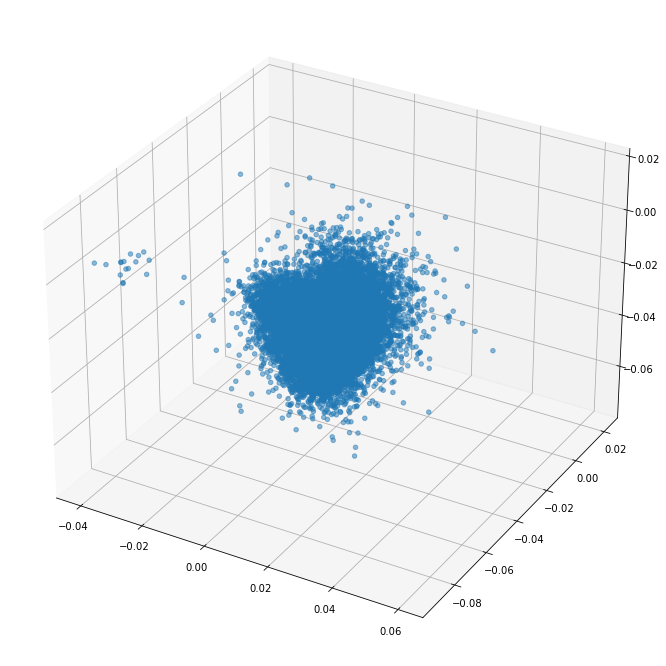

In [124]:
%matplotlib inline
#%matplotlib qt
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(doc_embedding.iloc[:,0],doc_embedding.iloc[:,1],doc_embedding.iloc[:,2],alpha=0.5)
plt.show()

## Reducción de Dimensión

### PCA 

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40, random_state=0)
pcs = pca.fit_transform(doc_embedding.values)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.23741727 0.40962904 0.52663158 0.59156428 0.64871013 0.68398267
 0.7091443  0.72614956 0.74021542 0.74976517 0.75828704 0.76570165
 0.77301997 0.77949004 0.78533118 0.79088819 0.79619576 0.80108775
 0.80557219 0.80972615 0.81372551 0.81759486 0.82128642 0.82481267
 0.82823091 0.83145109 0.83453298 0.83753191 0.84035937 0.84310368
 0.84575719 0.84833882 0.85089582 0.85326562 0.85558155 0.85779512
 0.85993271 0.86202035 0.86405766 0.86608235]


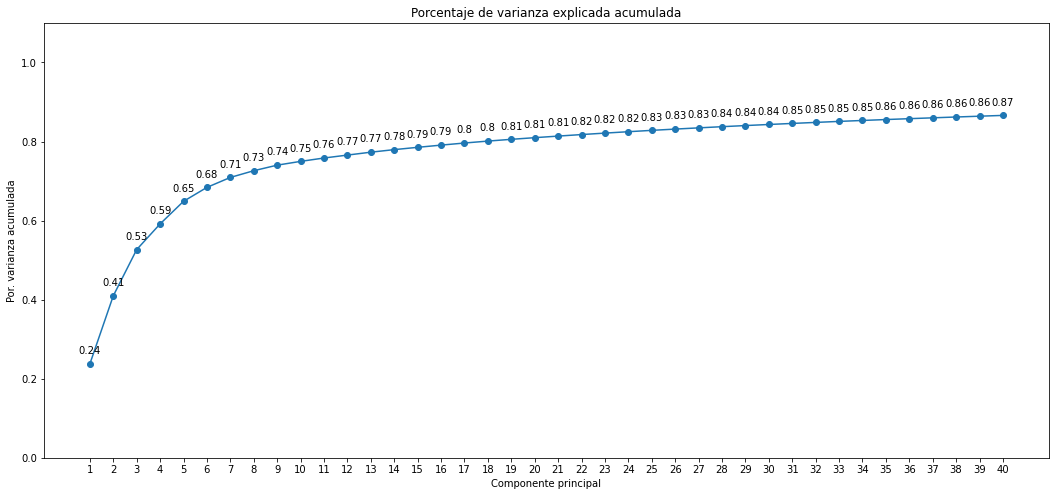

In [126]:
%matplotlib inline

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

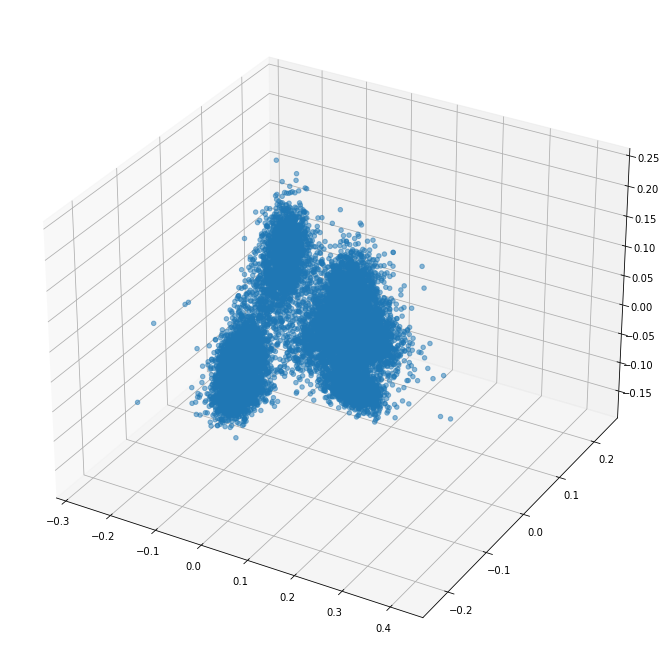

In [131]:
%matplotlib inline
#%matplotlib tk
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(pcs[:,0],pcs[:,1],pcs[:,2],alpha=0.5)
plt.show()

## Clustering

### K-Means 

In [93]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(pcs)

In [95]:
n_max = 80

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

sse = []

for k in range(1, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    sse.append(kmeans.inertia_)

### Elbow 

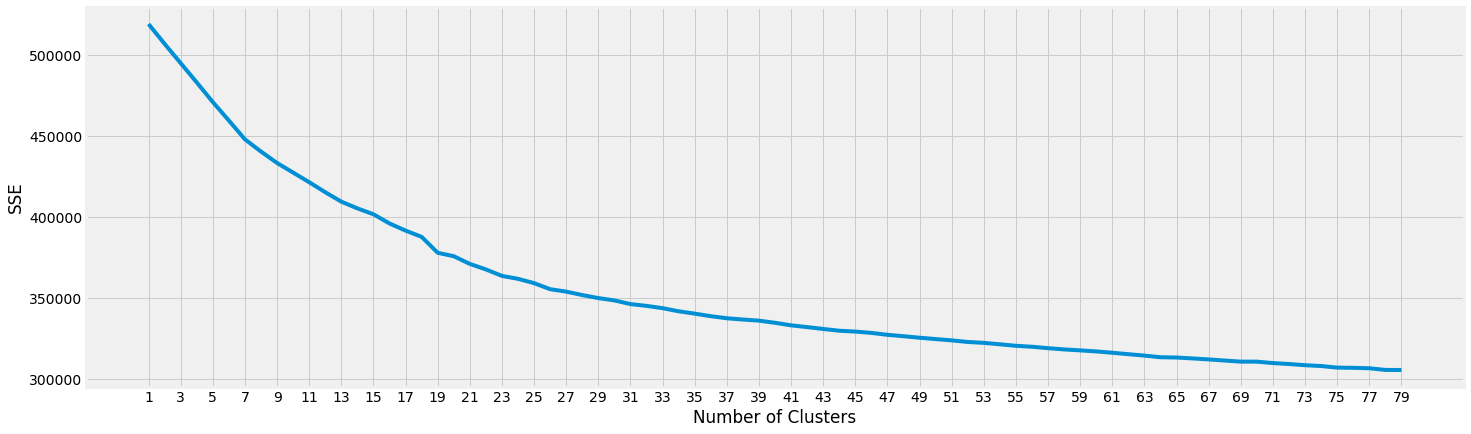

In [96]:
%matplotlib inline
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(1, n_max), sse)
plt.xticks(range(1, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Número Optimo de Clusters 

In [97]:
kl = KneeLocator(range(1, n_max), sse, curve="convex", direction="decreasing")

kl.elbow

26

### Silhouette Coefficients

In [98]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    score = silhouette_score(scaled_pcs, kmeans.labels_)
    silhouette_coefficients.append(score)

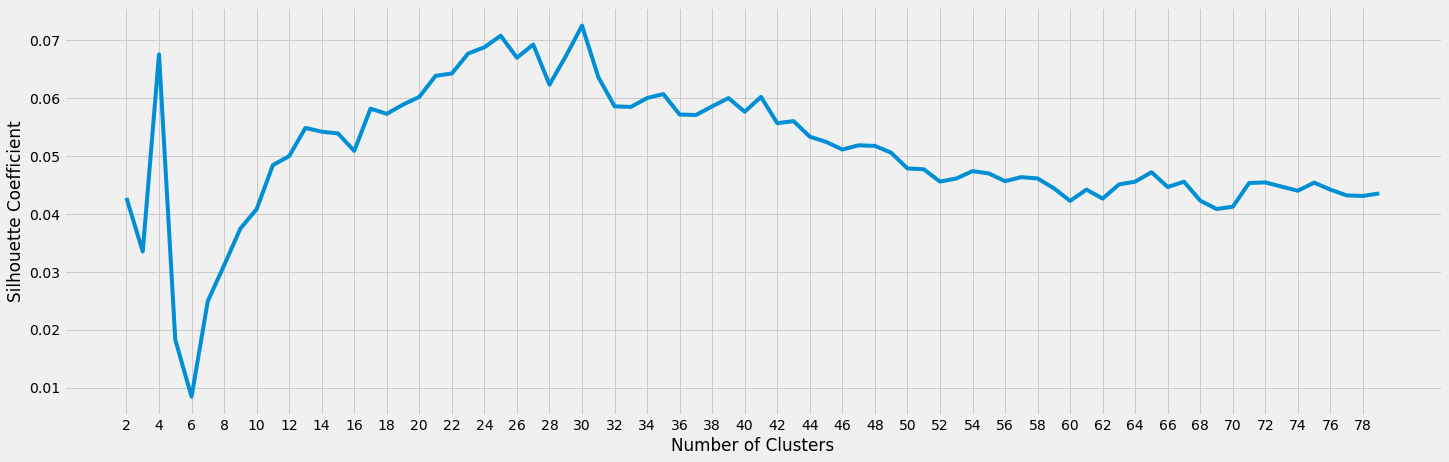

In [99]:
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(2, n_max), silhouette_coefficients)
plt.xticks(range(2, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [100]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, random_state=0)
km.fit_transform(scaled_pcs)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['Grupo'])

In [101]:
datos.columns

Index(['essay_id', 'essay_set', 'essay_text', 'domain1_score', 'tokens',
       'corrections', 'token_count', 'unique_token_count', 'nostop_count',
       'sent_count', 'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person', 'location', 'money',
       'time', 'date', 'percent', 'noun', 'adj', 'pron', 'verb', 'cconj',
       'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [102]:
data_final = pd.DataFrame([datos['essay_text'].values, ftext_feature_array,pcs,cluster_labels['Grupo']]).T
data_final.columns = ['essay','Embedding_300','PCA_40','Grupo']
data_final

,essay,Embedding_300,PCA_40,Grupo
0,"Dear local newspaper, I think effects computer...","[-0.0059098727, -0.029856939, -0.032569464, -0...","[-0.11778101188366319, 0.0707246150750284, -0....",7
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[-0.010748605, -0.034611, -0.029062685, -0.006...","[-0.09488435429576994, 0.06249272701763161, -0...",7
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[-0.0109783, -0.03012985, -0.024779217, -0.009...","[-0.08142034042612542, 0.0831116113726964, -0....",7
3,"Dear Local Newspaper, @CAPS1 I have found that...","[-0.011097829, -0.037431285, -0.039796356, -0....","[-0.0612340056048107, 0.08187754082863484, -0....",7
4,"Dear @LOCATION1, I know having computers has a...","[-0.0034227408, -0.0313029, -0.035088487, -0.0...","[-0.0717338278054967, 0.0713043541709781, -0.0...",7
...,...,...,...,...
12973,In most stories mothers and daughters are eit...,"[-0.015120966, -0.04890726, -0.042180862, -0.0...","[-0.083689245646106, -0.010718516289296117, 0....",0
12974,I never understood the meaning laughter is th...,"[-0.016522018, -0.046996858, -0.035109114, -0....","[-0.08664678311970667, -0.007707961204779486, ...",0
12975,"When you laugh, is @CAPS5 out of habit, or is ...","[-0.017164642, -0.048899904, -0.04324909, -0.0...","[-0.04574622535130465, 0.00489370548370959, 0....",0
12976,"Trippin' on fences I am @NUM1 years young, an...","[-0.016122267, -0.040828723, -0.04674796, -0.0...","[-0.06392713905817929, -0.017432351368572917, ...",0


In [103]:
data_final.to_csv('../Datos/FastText/essay_embedding_300_PCA_40_grupo.csv')

In [104]:
data_final.groupby('Grupo')[['Grupo']].describe().T

Grupo            0     1     2     3     4   5     6     7
Grupo count   2322  1799  1755  1702  1790  18  1796  1796
      unique     1     1     1     1     1   1     1     1
      top        0     1     2     3     4   5     6     7
      freq    2322  1799  1755  1702  1790  18  1796  1796

In [ ]:
datos

## Resultado de Clustering

In [105]:
%matplotlib inline
%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## Visualización por T-SNE

In [106]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(scaled_pcs)
X_embedded.shape

(12978, 3)

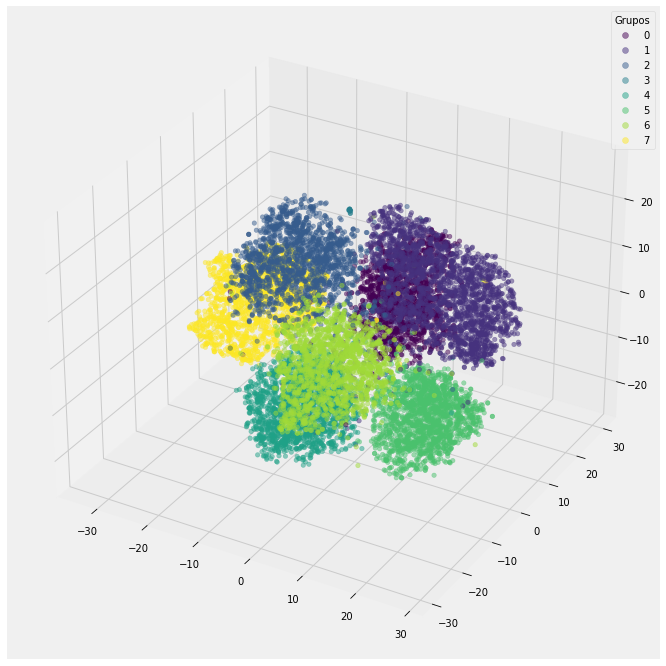

In [106]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],alpha=0.5,c=cluster_labels)
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.savefig('../Imagenes/TSE.png')
plt.show()

In [107]:
data_final = pd.DataFrame([datos['essay_text'].values,ftext_feature_array,pcs,X_embedded,cluster_labels['Grupo']]).T
data_final.columns = ['essay','Embedding_300','PCA_40','TSNE_3','Grupo']
data_final

,essay,Embedding_300,PCA_40,TSNE_3,Grupo
0,"Dear local newspaper, I think effects computer...","[-0.0059098727, -0.029856939, -0.032569464, -0...","[-0.11778101188366319, 0.0707246150750284, -0....","[13.979461, -6.4866014, -5.4764047]",7
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[-0.010748605, -0.034611, -0.029062685, -0.006...","[-0.09488435429576994, 0.06249272701763161, -0...","[8.98818, -15.00106, -2.1192412]",7
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[-0.0109783, -0.03012985, -0.024779217, -0.009...","[-0.08142034042612542, 0.0831116113726964, -0....","[23.165823, -12.054617, 5.692244]",7
3,"Dear Local Newspaper, @CAPS1 I have found that...","[-0.011097829, -0.037431285, -0.039796356, -0....","[-0.0612340056048107, 0.08187754082863484, -0....","[9.769121, -19.740902, 4.5529103]",7
4,"Dear @LOCATION1, I know having computers has a...","[-0.0034227408, -0.0313029, -0.035088487, -0.0...","[-0.0717338278054967, 0.0713043541709781, -0.0...","[8.34071, -19.918608, -0.10166031]",7
...,...,...,...,...,...
12973,In most stories mothers and daughters are eit...,"[-0.015120966, -0.04890726, -0.042180862, -0.0...","[-0.083689245646106, -0.010718516289296117, 0....","[-1.5306895, 15.142518, 20.60236]",0
12974,I never understood the meaning laughter is th...,"[-0.016522018, -0.046996858, -0.035109114, -0....","[-0.08664678311970667, -0.007707961204779486, ...","[-1.3583168, 15.416727, 20.478415]",0
12975,"When you laugh, is @CAPS5 out of habit, or is ...","[-0.017164642, -0.048899904, -0.04324909, -0.0...","[-0.04574622535130465, 0.00489370548370959, 0....","[1.8387308, 12.751096, 13.541498]",0
12976,"Trippin' on fences I am @NUM1 years young, an...","[-0.016122267, -0.040828723, -0.04674796, -0.0...","[-0.06392713905817929, -0.017432351368572917, ...","[-3.2923334, 9.576952, 16.282576]",0


In [108]:
data_final.to_csv('../Datos/FastText/essay_corrected_embedding_300_PCA_40_TSNE.csv')

In [14]:
data_final = pd.read_csv('../Datos/FastText/essay_corrected_embedding_300_PCA_40_grupo.csv',index_col=0)

## Ejemplos de Clusters 

In [109]:
cluster = 0

ensayos = data_final[data_final['Grupo']==cluster]
ensayos

,essay,Embedding_300,PCA_40,TSNE_3,Grupo
833,Dear local newspaper @CAPS1 I think that kids ...,"[-0.01123516, -0.04015179, -0.042698734, -0.01...","[-0.10077327750609769, -0.001548372312419109, ...","[7.504918, -3.7135105, 10.882196]",0
1834,"wow, that's racist. As I said when I saw the m...","[-0.014707244, -0.032386567, -0.044122055, -0....","[-0.10045094665836289, 0.0328335553616735, 0.0...","[-0.29478872, -2.586581, -8.849886]",0
2026,"Do you believe that certain materials, such as...","[-0.012441957, -0.04304464, -0.044049338, -0.0...","[-0.08738218938485526, 0.004120384136353476, 0...","[4.1159186, 6.673871, 8.994984]",0
2036,"I can think of several books that, I would not...","[-0.0032446336, -0.03666089, -0.040747374, -0....","[-0.04557305711120122, -0.026541926332498352, ...","[1.1961622, 2.0386212, 16.976326]",0
2252,"Throughout the world, there are thousands of p...","[-0.02171819, -0.051368333, -0.04808693, -0.01...","[-0.07899173792929445, 0.011082190112300012, 0...","[-3.1400075, 5.761436, 18.647488]",0
...,...,...,...,...,...
12973,In most stories mothers and daughters are eit...,"[-0.015120966, -0.04890726, -0.042180862, -0.0...","[-0.083689245646106, -0.010718516289296117, 0....","[-1.5306895, 15.142518, 20.60236]",0
12974,I never understood the meaning laughter is th...,"[-0.016522018, -0.046996858, -0.035109114, -0....","[-0.08664678311970667, -0.007707961204779486, ...","[-1.3583168, 15.416727, 20.478415]",0
12975,"When you laugh, is @CAPS5 out of habit, or is ...","[-0.017164642, -0.048899904, -0.04324909, -0.0...","[-0.04574622535130465, 0.00489370548370959, 0....","[1.8387308, 12.751096, 13.541498]",0
12976,"Trippin' on fences I am @NUM1 years young, an...","[-0.016122267, -0.040828723, -0.04674796, -0.0...","[-0.06392713905817929, -0.017432351368572917, ...","[-3.2923334, 9.576952, 16.282576]",0


In [110]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

In [ ]:
cluster = 0

ensayos = data_final[data_final['Grupo']==cluster]

for i in range(3):
    ensayo = ensayos.essay.sample().values
    print(''.join(ensayo))
    print()
    traduccion = translator(''.join(ensayo))
    print(traduccion[0]['translation_text'])    
    print()

## Tópicos Originales

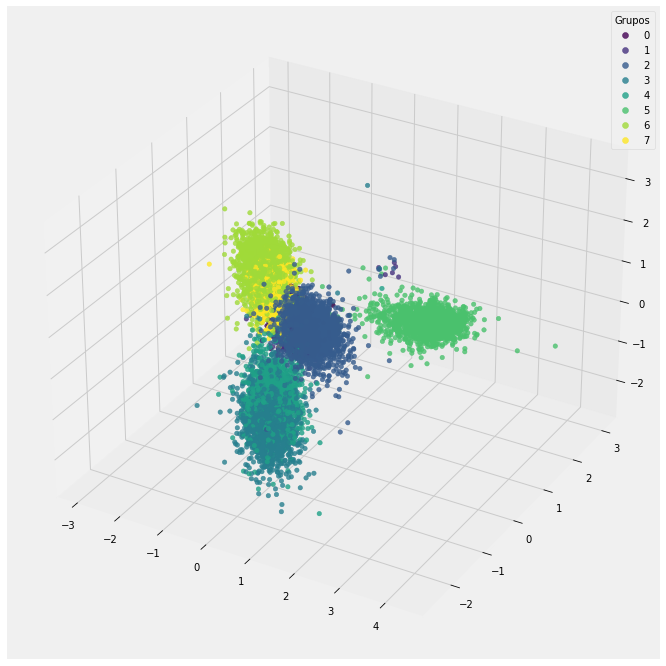

In [112]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=datos['essay_set'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## Visualización por T-SNE (Tópicos Originales)

In [113]:
from sklearn.manifold import TSNE
X_embedded_2 = TSNE(n_components=3).fit_transform(scaled_pcs)
X_embedded_2.shape

(12978, 3)

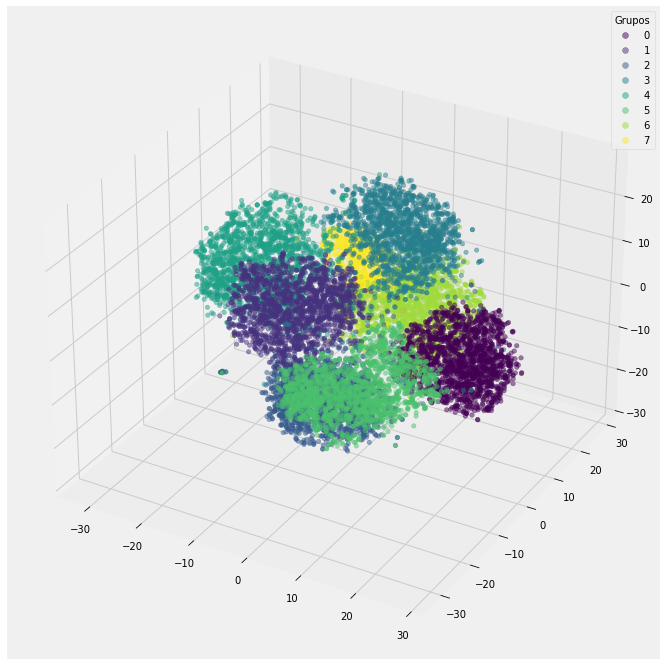

In [114]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(X_embedded_2[:,0],X_embedded_2[:,1],X_embedded_2[:,2],alpha=0.5,c=datos['essay_set'])
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## Tópicos Originales vs clustering

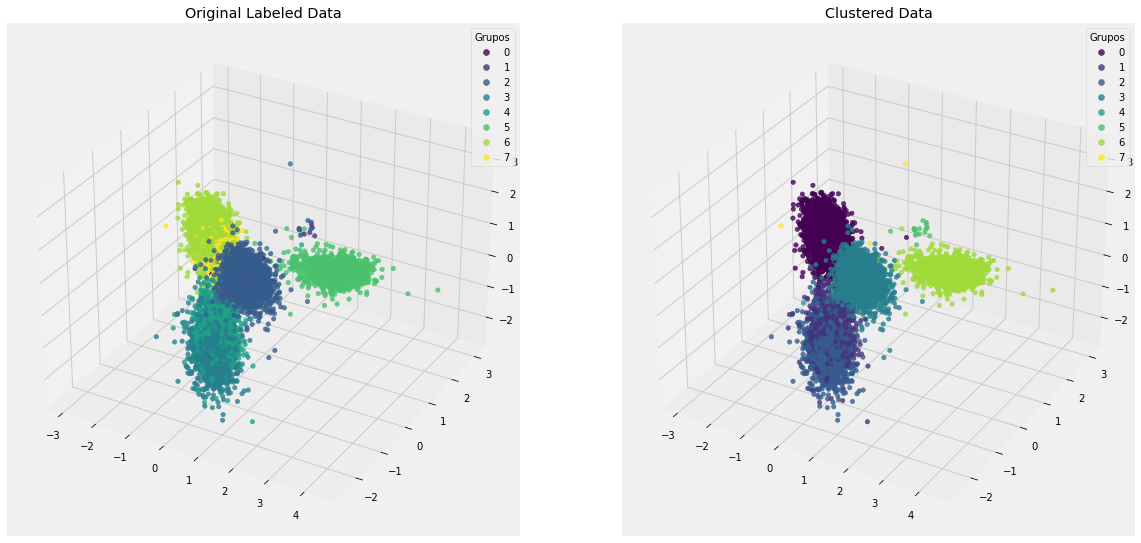

In [115]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=datos['essay_set'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.title('Original Labeled Data')

ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.title('Clustered Data')
plt.savefig('../Imagenes/clusters.png')
plt.show()

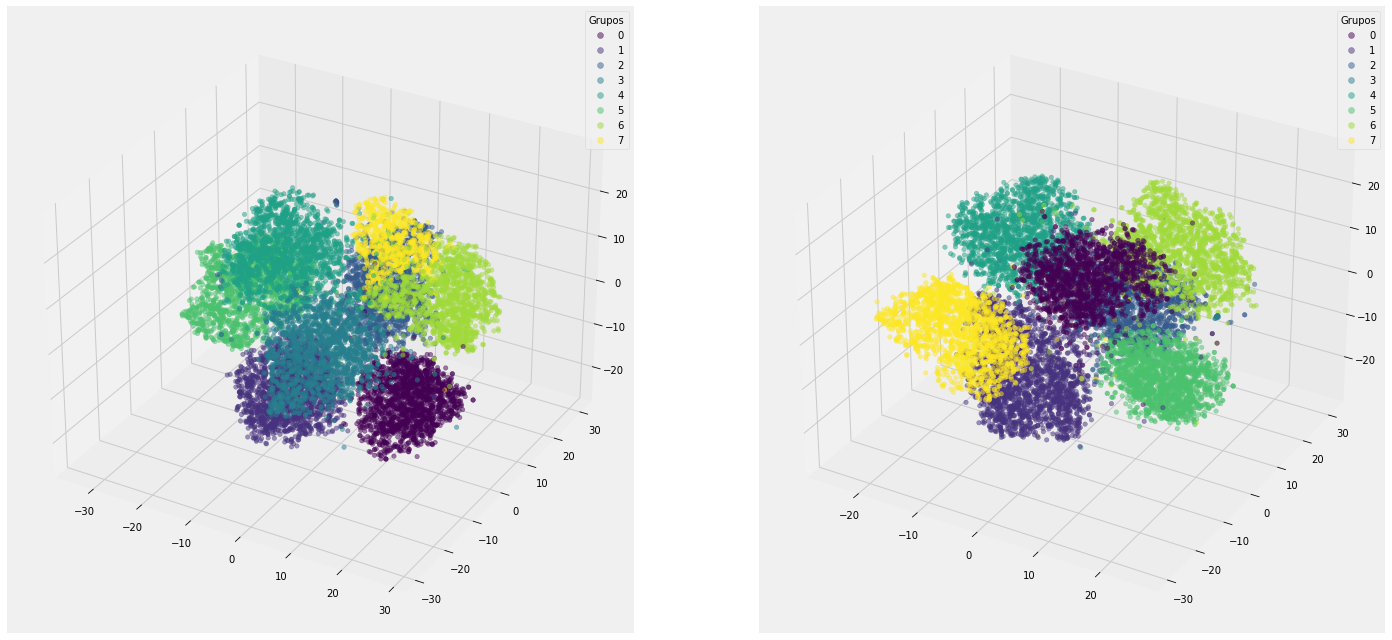

In [131]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],alpha=0.5,c=datos['essay_set'])
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")

ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter3D(X_embedded_2[:,0],X_embedded_2[:,1],X_embedded_2[:,2],alpha=0.5,c=cluster_labels)
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

[[Volver]](#Contenido)

## Aprendizaje Supervisado

In [19]:
# Motor de Inteligencia Artificial
import tensorflow as tf
# Manejo de arreglos
import pandas as pd
import numpy as np
# Chequear Versión de tensorflow
print("tensorflow version:",tf.__version__)

tensorflow version: 2.4.1


In [20]:
datos = pd.read_pickle('../Datos/Model_Data/Model_Data.pkl')
embedding = pd.read_csv('../Datos/Model_Data/Embedding/Doc_Embedding_300.csv')
embedding_vector_length = embedding.shape[1]
embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.010224,-0.038323,-0.027793,-0.024668,-0.005343,-0.008129,-0.025293,-0.013586,0.018538,-0.022885,...,-0.030964,0.023123,0.043834,0.018006,-0.002226,-0.002246,-0.026736,0.031609,-0.000006,-0.037783
1,-0.006333,-0.043431,-0.021787,-0.026094,0.009628,-0.007389,-0.028682,-0.011060,0.023295,-0.019511,...,-0.024974,0.023997,0.041497,0.024633,-0.001861,-0.010875,-0.029118,0.030272,0.003863,-0.038842
2,-0.008260,-0.035998,-0.023476,-0.029862,0.010140,-0.016234,-0.025587,-0.023917,0.015748,-0.012901,...,-0.028837,0.018534,0.045696,0.011589,0.003216,-0.007365,-0.017180,0.029428,0.007896,-0.039955
3,-0.003679,-0.039250,-0.021738,-0.029681,0.020427,-0.008905,-0.031870,-0.009708,0.019779,-0.012563,...,-0.023058,0.019847,0.050342,0.022466,0.002503,0.001259,-0.012824,0.026940,0.014261,-0.033281
4,-0.003671,-0.035160,-0.026918,-0.026073,0.006190,-0.009019,-0.035956,-0.008473,0.023383,-0.015215,...,-0.026779,0.015716,0.040157,0.023867,0.004495,-0.005037,-0.028196,0.025671,0.013939,-0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.008794,-0.050452,-0.025216,-0.018447,0.008472,-0.013148,-0.034246,-0.010397,0.006626,-0.013421,...,-0.024795,0.033274,0.049182,0.012787,0.006608,0.005025,-0.019304,0.017536,0.019247,-0.028178
12974,0.015489,-0.046033,-0.024427,-0.024349,0.010841,-0.007350,-0.029004,-0.010510,0.005568,-0.019352,...,-0.019599,0.033864,0.047702,0.019347,0.006006,-0.005485,-0.024577,0.016896,0.014662,-0.032809
12975,0.018171,-0.053933,-0.026774,-0.020874,0.007397,-0.011077,-0.035225,-0.012893,0.000974,-0.021037,...,-0.021237,0.027104,0.048141,0.021645,0.001876,0.001000,-0.024729,0.017872,0.020158,-0.023729
12976,0.017284,-0.047639,-0.023452,-0.020738,0.011532,-0.011620,-0.046671,-0.012111,0.005687,-0.008826,...,-0.015225,0.031379,0.042661,0.025063,-0.003220,0.004838,-0.019405,0.009934,0.013288,-0.021095


In [21]:
embedding[:2]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.010224,-0.038323,-0.027793,-0.024668,-0.005343,-0.008129,-0.025293,-0.013586,0.018538,-0.022885,...,-0.030964,0.023123,0.043834,0.018006,-0.002226,-0.002246,-0.026736,0.031609,-0.000006,-0.037783
1,-0.006333,-0.043431,-0.021787,-0.026094,0.009628,-0.007389,-0.028682,-0.011060,0.023295,-0.019511,...,-0.024974,0.023997,0.041497,0.024633,-0.001861,-0.010875,-0.029118,0.030272,0.003863,-0.038842


## Rangos del Embedding 

In [48]:
embedding.min().min()

-0.1596972

In [49]:
embedding.max().max()

0.18074721

In [58]:
features = datos.select_dtypes(include='number').iloc[:,2:]
features

,score,num_corrections,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,0.8,16,395,180,203,16,2,18,3,4,...,19,48,51,14,14,21,6,0,16,2
1,0.9,25,459,206,240,21,9,16,3,1,...,19,52,72,18,19,29,8,5,10,0
2,0.7,17,311,163,158,14,2,13,0,0,...,18,27,39,16,11,26,4,3,10,0
3,1.0,29,577,264,331,30,6,14,1,2,...,42,32,73,17,22,43,32,0,23,0
4,0.8,17,519,209,251,30,6,15,0,0,...,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,3.5,20,964,345,459,35,20,60,0,0,...,46,151,129,55,64,51,33,13,23,4
12974,3.2,33,646,229,335,44,15,24,10,0,...,36,82,77,26,52,48,18,5,17,3
12975,4.0,13,953,381,512,44,16,48,7,9,...,37,107,121,37,51,75,53,5,21,1
12976,4.0,6,670,260,358,39,11,41,2,0,...,43,105,71,22,53,40,16,4,10,1


In [59]:
features.columns

Index(['score', 'num_corrections', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [60]:
#target = features_st_norm['standard_score']
target = features['score']
target

0        0.8
1        0.9
2        0.7
3        1.0
4        0.8
        ... 
12973    3.5
12974    3.2
12975    4.0
12976    4.0
12977    4.0
Name: score, Length: 12978, dtype: float64

In [61]:
features = features.iloc[:,1:]
features

,num_corrections,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,quotation,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,16,395,180,203,16,2,18,3,4,7,...,19,48,51,14,14,21,6,0,16,2
1,25,459,206,240,21,9,16,3,1,5,...,19,52,72,18,19,29,8,5,10,0
2,17,311,163,158,14,2,13,0,0,5,...,18,27,39,16,11,26,4,3,10,0
3,29,577,264,331,30,6,14,1,2,6,...,42,32,73,17,22,43,32,0,23,0
4,17,519,209,251,30,6,15,0,0,6,...,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,20,964,345,459,35,20,60,0,0,29,...,46,151,129,55,64,51,33,13,23,4
12974,33,646,229,335,44,15,24,10,0,23,...,36,82,77,26,52,48,18,5,17,3
12975,13,953,381,512,44,16,48,7,9,22,...,37,107,121,37,51,75,53,5,21,1
12976,6,670,260,358,39,11,41,2,0,23,...,43,105,71,22,53,40,16,4,10,1


## Preparación de Datos 

In [9]:
valid = pd.read_excel('../Datos/Asap_data/valid_set.xls',usecols=['essay_id','essay_set','essay'])
valid

,essay_id,essay_set,essay
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop..."
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...
2,1790,1,"Dear Local newspaper, Have you been spending a..."
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul..."
4,1792,1,"Dear newspaper, I strongly believe that comput..."
...,...,...,...
4213,21933,8,Have you ever noticed that if two little kids...
4214,21934,8,Laughter @CAPS1 I ...
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...


In [10]:
test = pd.read_csv('../Datos/Asap_data/test_set.tsv',sep='\t', encoding = "ISO-8859-1",usecols=['essay_id','essay_set','essay'])
test

,essay_id,essay_set,essay
0,2383,1,I believe that computers have a positive effec...
1,2384,1,"Dear @CAPS1, I know some problems have came up..."
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are..."
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte..."
4,2387,1,"Dear Local newspaper, I think that people have..."
...,...,...,...
4249,22238,8,Just One @CAPS1 @CAPS2 can bring people togeth...
4250,22239,8,@CAPS8 Was my first time going to the band ca...
4251,22240,8,Laughter is one of the most important things i...
4252,22241,8,A @CAPS1 Of @C...


## Muestreo Estratificado

In [62]:
datos.columns

Index(['essay_id', 'essay_set', 'corrected', 'score', 'tokens',
       'num_corrections', 'token_count', 'unique_token_count', 'nostop_count',
       'sent_count', 'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person', 'location', 'money',
       'time', 'date', 'percent', 'noun', 'adj', 'pron', 'verb', 'cconj',
       'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [63]:
conteo = datos.groupby('essay_set')[['essay_set']].count()
conteo

,essay_set
essay_set,
1,1783
2,1800
3,1726
4,1772
5,1805
6,1800
7,1569
8,723


In [64]:
# Muestras para validación
muestra = np.round(conteo*0.1,decimals=0).astype(int)
muestra

,essay_set
essay_set,
1,178
2,180
3,173
4,177
5,180
6,180
7,157
8,72


In [65]:
# Función de Muestreo Estratificado
def strat(df,label,groups):
    
    strat = pd.DataFrame([])
    
    for i,cat in enumerate(sorted(df[f'{label}'].unique())):
        df_cal = df[df[f'{label}']==cat]
        muestra = df_cal.sample(groups[i],random_state=22)
        strat = pd.concat([strat,muestra])
    return strat

## Datos Test 

In [66]:
data_test = strat(datos,'essay_set',muestra['essay_set'].values)
data_test

,essay_id,essay_set,corrected,score,tokens,num_corrections,token_count,unique_token_count,nostop_count,sent_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
829,832,1,"Dear editor, computers are good for people bec...",0.2,"[Dear, editor, ,, computers, are, good, for, p...",1,21,20,11,1,...,3,2,2,2,1,0,0,0,0,0
1366,1371,1,"Dear Local Newspaper, I feel that negative eff...",1.2,"[Dear, Local, Newspaper, ,, I, feel, that, neg...",29,609,257,324,34,...,42,60,61,25,35,38,16,0,11,2
329,331,1,"Dear @CAPS1, A recent study by scientists show...",1.0,"[Dear, @CAPS1, ,, A, recent, study, by, scient...",10,549,249,272,34,...,30,70,72,21,28,35,2,2,19,0
1278,1283,1,"Dear @CAPS1, In a recent poll it was determine...",1.0,"[Dear, @CAPS1, ,, In, a, recent, poll, it, was...",5,401,200,227,25,...,22,36,52,16,20,27,6,0,8,0
1102,1105,1,"Dear editor, @TIME1 week, I noticed an article...",0.9,"[Dear, editor, ,, @TIME1, week, ,, I, noticed,...",11,443,189,248,26,...,27,56,54,17,23,21,9,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,21327,8,I was in @NUM1 grade; when it was almost the ...,3.3,"[ , I, was, in, @NUM1, grade, ;, when, it, was...",22,540,210,220,16,...,28,111,65,27,29,28,3,4,9,5
12825,21433,8,A @CAPS1 @CAPS2 The @CAPS3 @CAPS4 was a warm ...,3.5,"[ , A, @CAPS1, @CAPS2, The, @CAPS3, @CAPS4, wa...",23,874,327,459,52,...,47,103,118,25,60,78,51,5,23,1
12271,20736,8,"""Laughter"" A good relationship is built on tr...",4.5,"[ , "", Laughter, "", A, good, relationship, is,...",11,817,322,425,42,...,63,125,101,28,47,41,19,8,24,1
12738,21319,8,The snow shimmered in the sunlight like sequi...,4.6,"[ , The, snow, shimmered, in, the, sunlight, l...",6,845,376,498,61,...,53,121,111,21,29,77,11,2,16,0


In [67]:
# Sacar Validation y training
data_train = datos.loc[np.setdiff1d(datos.index,data_test.index)]
data_train

,essay_id,essay_set,corrected,score,tokens,num_corrections,token_count,unique_token_count,nostop_count,sent_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",0.8,"[Dear, local, newspaper, ,, I, think, effects,...",16,395,180,203,16,...,19,48,51,14,14,21,6,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.9,"[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",25,459,206,240,21,...,19,52,72,18,19,29,8,5,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.7,"[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",17,311,163,158,14,...,18,27,39,16,11,26,4,3,10,0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",1.0,"[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",29,577,264,331,30,...,42,32,73,17,22,43,32,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.8,"[Dear, @LOCATION1, ,, I, know, having, compute...",17,519,209,251,30,...,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3.5,"[ , In, most, stories, mothers, and, daughters...",20,964,345,459,35,...,46,151,129,55,64,51,33,13,23,4
12974,21628,8,I never understood the meaning laughter is th...,3.2,"[ , I, never, understood, the, meaning, laught...",33,646,229,335,44,...,36,82,77,26,52,48,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",4.0,"[When, you, laugh, ,, is, @CAPS5, out, of, hab...",13,953,381,512,44,...,37,107,121,37,51,75,53,5,21,1
12976,21630,8,"Trippin' on fences I am @NUM1 years young, an...",4.0,"[ , Trippin, ', on, fences, I, am, @NUM1, year...",6,670,260,358,39,...,43,105,71,22,53,40,16,4,10,1


In [68]:
embedding_train = embedding.iloc[data_train.index]
embedding_test = embedding.iloc[data_test.index]
print(embedding_train.shape)
print(embedding_test.shape)
print(embedding_train.shape[0] + embedding_test.shape[0])

(11681, 300)
(1297, 300)
12978


In [69]:
features_train = features.iloc[data_train.index]
features_test = features.iloc[data_test.index]
print(features_train.shape)
print(features_test.shape)

(11681, 29)
(1297, 29)


In [70]:
target_train = target.iloc[data_train.index]
target_test = target.iloc[data_test.index]

## Cambio de Escalas features

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1.0,1.0))

features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_test_scaled = pd.DataFrame(scaler.fit_transform(features_test))
#target_train_scaled = scaler.fit_transform(target_train.values.reshape(-1,1))
#target_test_scaled = scaler.fit_transform(target_test.values.reshape(-1,1))
features_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.741935,-0.369687,-0.289421,-0.453804,-0.711538,-0.918367,-0.520000,-0.956522,-0.703704,-0.866667,...,-0.547619,-0.567568,-0.423729,-0.600000,-0.702128,-0.603774,-0.889908,-1.000000,-0.448276,-0.897436
1,-0.596774,-0.267041,-0.185629,-0.353261,-0.615385,-0.632653,-0.573333,-0.956522,-0.925926,-0.904762,...,-0.547619,-0.531532,-0.186441,-0.485714,-0.595745,-0.452830,-0.853211,-0.545455,-0.655172,-1.000000
2,-0.725806,-0.504411,-0.357285,-0.576087,-0.750000,-0.918367,-0.653333,-1.000000,-1.000000,-0.904762,...,-0.571429,-0.756757,-0.559322,-0.542857,-0.765957,-0.509434,-0.926606,-0.727273,-0.655172,-1.000000
3,-0.532258,-0.077787,0.045908,-0.105978,-0.442308,-0.755102,-0.626667,-0.985507,-0.851852,-0.885714,...,0.000000,-0.711712,-0.175141,-0.514286,-0.531915,-0.188679,-0.412844,-1.000000,-0.206897,-1.000000
4,-0.725806,-0.170810,-0.173653,-0.323370,-0.442308,-0.755102,-0.600000,-1.000000,-1.000000,-0.885714,...,-0.404762,-0.630631,-0.299435,-0.571429,-0.255319,-0.075472,-0.926606,-0.636364,-0.310345,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,-0.677419,0.542903,0.369261,0.241848,-0.346154,-0.183673,0.600000,-1.000000,-1.000000,-0.447619,...,0.095238,0.360360,0.457627,0.571429,0.361702,-0.037736,-0.394495,0.181818,-0.206897,-0.794872
11677,-0.467742,0.032879,-0.093812,-0.095109,-0.173077,-0.387755,-0.360000,-0.855072,-1.000000,-0.561905,...,-0.142857,-0.261261,-0.129944,-0.257143,0.106383,-0.094340,-0.669725,-0.545455,-0.413793,-0.846154
11678,-0.790323,0.525261,0.512974,0.385870,-0.173077,-0.346939,0.280000,-0.898551,-0.333333,-0.580952,...,-0.119048,-0.036036,0.367232,0.057143,0.085106,0.415094,-0.027523,-0.545455,-0.275862,-0.948718
11679,-0.903226,0.071371,0.029940,-0.032609,-0.269231,-0.551020,0.093333,-0.971014,-1.000000,-0.561905,...,0.023810,-0.054054,-0.197740,-0.371429,0.127660,-0.245283,-0.706422,-0.636364,-0.655172,-0.948718


## Librerías Requeridas

In [20]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow_addons.metrics import RSquare
#from tensorflow_addons.optimizers import AdamW

embedding_vector_length = 300

## Primer Modelo 

In [22]:
x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1],),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
#x = Concatenate(name='Concatenar')([x1,x2])
#x = Dropout(0.2)(x2)
#x = Dense(128,activation='elu',name='Capa_Densa')(x)
x = Dropout(0.2)(x1)
x = Dense(16,activation='elu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
x = Dense(8,activation='elu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='elu',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae',RSquare()])

model.summary()

Metal device set to: Apple M1
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Embedding (InputLayer)   [(None, 300)]        0           []                               
                                                                                                  
 dropout (Dropout)              (None, 300)          0           ['Input_Embedding[0][0]']        
                                                                                                  
 Capa_Densa_1 (Dense)           (None, 16)           4816        ['dropout[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 16)           0           ['Capa_Densa_1[0][0]']           
                                                                

2022-06-06 20:02:45.379033: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-06 20:02:45.379137: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


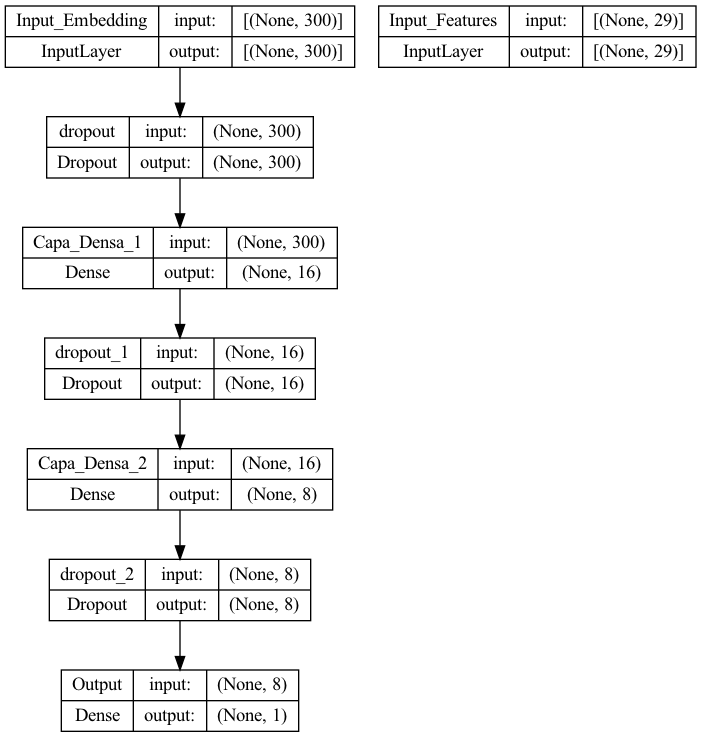

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='../Imagenes/model_1.png')

In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1)

Epoch 1/100


2022-06-06 20:02:54.715900: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/366 [..............................] - ETA: 4:12 - loss: 1.1909 - mae: 0.6585 - r_square: -0.5602

2022-06-06 20:02:55.247935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


366/366 [==============================] - ETA: 0s - loss: 0.4978 - mae: 0.4170 - r_square: 0.3705

2022-06-06 20:02:59.068929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


366/366 [==============================] - 5s 11ms/step - loss: 0.4978 - mae: 0.4170 - r_square: 0.3705 - val_loss: 0.3033 - val_mae: 0.3349 - val_r_square: 0.6044
Epoch 2/100
366/366 [==============================] - 4s 10ms/step - loss: 0.3014 - mae: 0.3490 - r_square: 0.6189 - val_loss: 0.2207 - val_mae: 0.3065 - val_r_square: 0.7122
Epoch 3/100
366/366 [==============================] - 4s 11ms/step - loss: 0.2534 - mae: 0.3432 - r_square: 0.6796 - val_loss: 0.1910 - val_mae: 0.2931 - val_r_square: 0.7509
Epoch 4/100
366/366 [==============================] - 4s 10ms/step - loss: 0.2319 - mae: 0.3341 - r_square: 0.7067 - val_loss: 0.1738 - val_mae: 0.2882 - val_r_square: 0.7733
Epoch 5/100
366/366 [==============================] - 4s 10ms/step - loss: 0.2171 - mae: 0.3258 - r_square: 0.7255 - val_loss: 0.1648 - val_mae: 0.2829 - val_r_square: 0.7851
Epoch 6/100
366/366 [==============================] - 4s 10ms/step - loss: 0.2084 - mae: 0.3201 - r_square: 0.7365 - val_loss: 0.16

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.show()

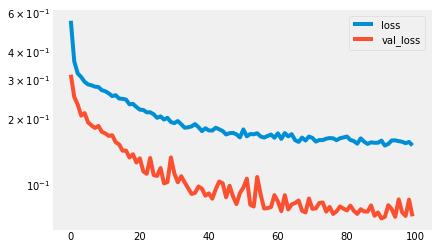

In [169]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [170]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

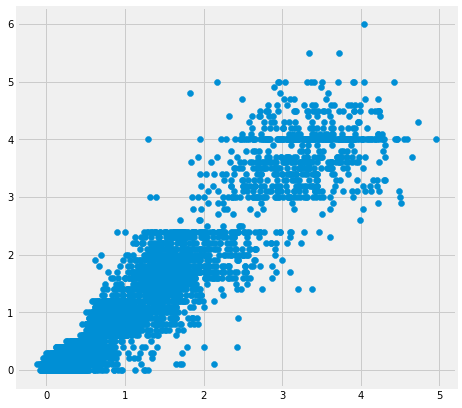

In [171]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [172]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.95052212],
       [0.95052212, 1.        ]])

In [173]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

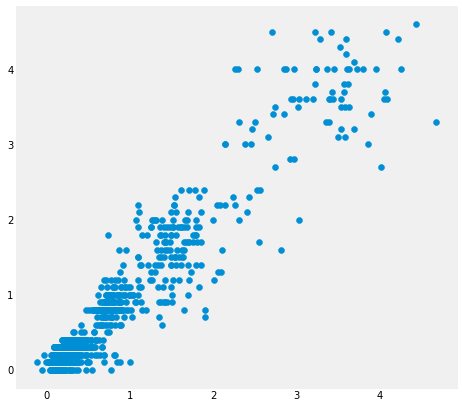

In [174]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [175]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.       , 0.9546166],
       [0.9546166, 1.       ]])

## Segundo Modelo

In [147]:
from tensorflow import keras
from tensorflow_addons.metrics import RSquare

In [213]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1],),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
#x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x2)
x = Dense(64,activation='elu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
#
x = Dense(32,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='relu',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae',RSquare()])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     [(None, 29)]         0                                            
__________________________________________________________________________________________________
dropout_16 (Dropout)            (None, 29)           0           Input_Features[0][0]             
__________________________________________________________________________________________________
Capa_Densa_1 (Dense)            (None, 64)           1920        dropout_16[0][0]                 
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 64)           0           Capa_Densa_1[0][0]               
____________________________________________________________________________________________

In [214]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='../Imagenes/model_2.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1)

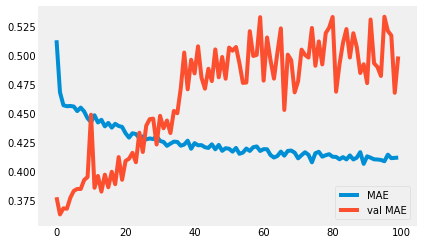

In [179]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

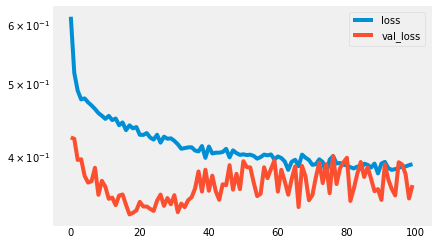

In [180]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [181]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

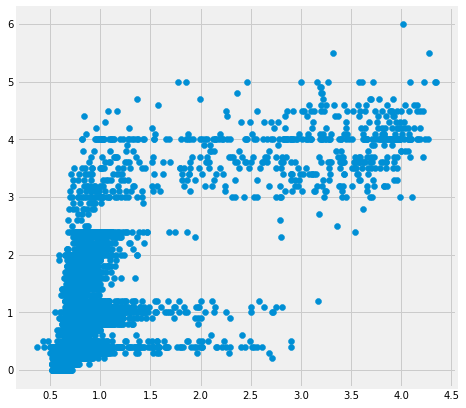

In [182]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [183]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.76197945],
       [0.76197945, 1.        ]])

In [184]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

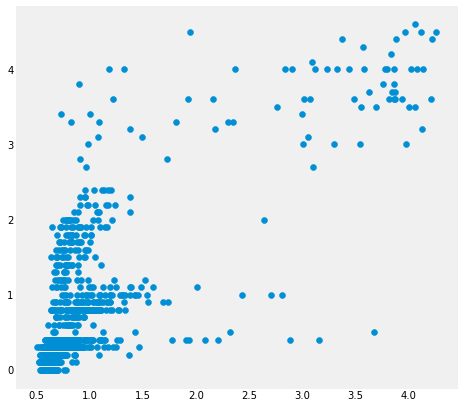

In [185]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [186]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.77505759],
       [0.77505759, 1.        ]])

## Tercer Modelo (Embeddings + Features)

In [72]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ReduceLROnPlateau
#import tensorflow_addons.optimizers.AdamW as AdamW

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1],),name='Input_Features')

x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x)
x = Dense(128,activation='relu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(32,activation='relu',name='Capa_Densa_3')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='relu',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae',RSquare()])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
Input_Features (InputLayer)     [(None, 29)]         0                                            
__________________________________________________________________________________________________
Concatenar (Concatenate)        (None, 329)          0           Input_Embedding[0][0]            
                                                                 Input_Features[0][0]             
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 329)          0           Concatenar[0][0]           

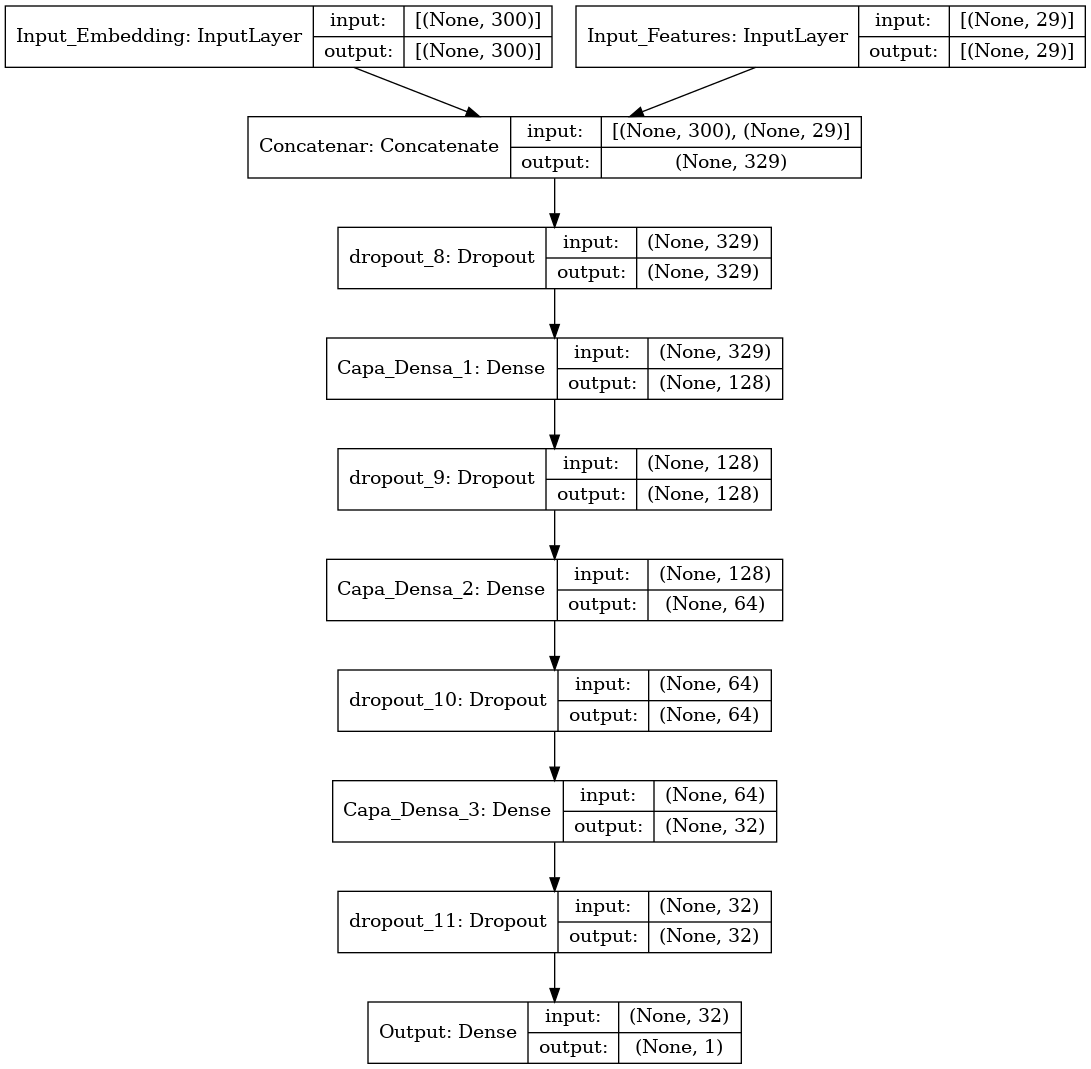

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='../Imagenes/model_3.png')

In [75]:
class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_weights= self.model.get_weights()
                
save_best_model = SaveBestModel()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-8)

In [76]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1, callbacks=[save_best_model])

Epoch 1/100
366/366 [==============================] - 2s 4ms/step - loss: 0.5788 - mae: 0.4684 - r_square: 0.2491 - val_loss: 0.1546 - val_mae: 0.2309 - val_r_square: 0.7984
Epoch 2/100
366/366 [==============================] - 2s 4ms/step - loss: 0.2102 - mae: 0.2773 - r_square: 0.7397 - val_loss: 0.1134 - val_mae: 0.2016 - val_r_square: 0.8522
Epoch 3/100
366/366 [==============================] - 2s 4ms/step - loss: 0.1821 - mae: 0.2441 - r_square: 0.7686 - val_loss: 0.1102 - val_mae: 0.2139 - val_r_square: 0.8563
Epoch 4/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1588 - mae: 0.2301 - r_square: 0.8098 - val_loss: 0.0718 - val_mae: 0.1593 - val_r_square: 0.9063
Epoch 5/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1267 - mae: 0.2007 - r_square: 0.8334 - val_loss: 0.0593 - val_mae: 0.1478 - val_r_square: 0.9226
Epoch 6/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1137 - mae: 0.1917 - r_square: 0.8539 - val_loss

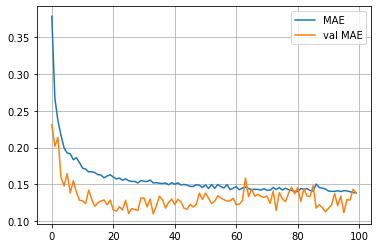

In [77]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.savefig('../Imagenes/Val_MAE.png')
plt.show()

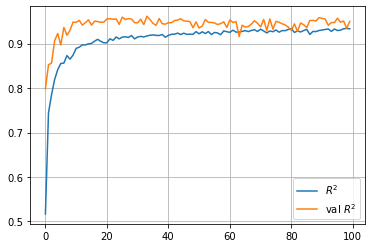

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['r_square'], label='$R^2$')
plt.plot(history.history['val_r_square'], label='val $R^2$')
plt.legend()
plt.grid()
plt.savefig('../Imagenes/Val_R_square.png')
plt.show()

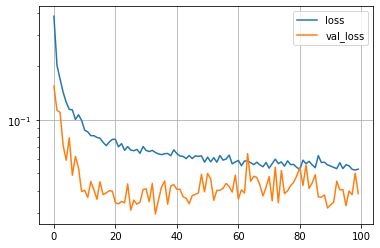

In [79]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.savefig('../Imagenes/Val_Loss.png')
plt.show()

### Best Checkpoint 

In [80]:
model.set_weights(save_best_model.best_weights)

In [81]:
save_best_model.best

0.029637189581990242

Epoch 55/100
366/366 [==============================] - 2s 5ms/step - loss: 0.0671 - mae: 0.1446 - r_square: 0.9159 - val_loss: 0.0307 - val_mae: 0.1037 - val_r_square: 0.9608

In [82]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

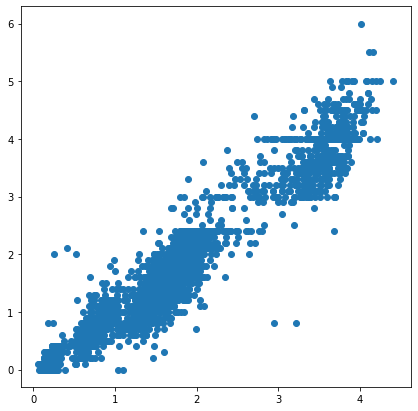

In [83]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.savefig('../Imagenes/Model_Train.png')
plt.show()

In [89]:
import scipy
from scipy.stats import kendalltau

import sklearn
from sklearn.metrics import r2_score

In [90]:
# Pearson r trainin
r = scipy.stats.pearsonr(y_true,y_pred.reshape(-1))
#kendall-tau
tau, _ =  kendalltau(y_true, y_pred.reshape(-1))
# spearman(rank) rho
rho = scipy.stats.spearmanr(y_true, y_pred.reshape(-1))
r_square = r2_score(y_true, y_pred.reshape(-1))

print('pearson =', r)
print('kendall =', tau)
print('spearman =', rho)
print('rsquare =', r_square)

pearson = (0.9811492522639222, 0.0)
kendall = 0.8355905179718774
spearman = SpearmanrResult(correlation=0.9425985367438608, pvalue=0.0)
rsquare = 0.9613501239196383


In [85]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

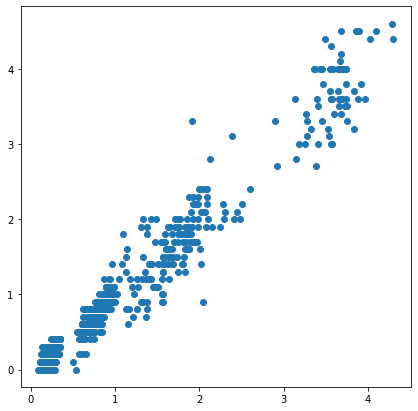

In [86]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.savefig('../Imagenes/Model_Test.png')
plt.show()

In [91]:
# Pearson r trainin
r = scipy.stats.pearsonr(y_true,y_pred.reshape(-1))
#kendall-tau
tau, _ =  kendalltau(y_true, y_pred.reshape(-1))
# spearman(rank) rho
rho = scipy.stats.spearmanr(y_true, y_pred.reshape(-1))
r_square = r2_score(y_true, y_pred.reshape(-1))

print('pearson =', r)
print('kendall =', tau)
print('spearman =', rho)
print('rsquare =', r_square)

pearson = (0.9811492522639222, 0.0)
kendall = 0.8355905179718774
spearman = SpearmanrResult(correlation=0.9425985367438608, pvalue=0.0)
rsquare = 0.9613501239196383


In [88]:
(y_true, y_pred.reshape(-1))

(829      0.2
 1366     1.2
 329      1.0
 1278     1.0
 1102     0.9
         ... 
 12744    3.3
 12825    3.5
 12271    4.5
 12738    4.6
 12602    4.0
 Name: score, Length: 1297, dtype: float64,
 array([0.60526043, 0.92723346, 0.9016124 , ..., 3.6793175 , 4.2822366 ,
        3.4312787 ], dtype=float32))

$R^2 = 0.954$ en validacion

|statistics|trainig|validation|test|
|---|---|---|---|
|$R^2$|0.96|0.96|0.96|
|Person-r|0.98|0.98|0.98|
|Kendall-$\tau$|0.84 |0.84|0.84|
|Spearman-$\rho$|0.94 |094|0.94|

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   1.,
          6.,   3.,   7.,  12.,  11.,  11.,  20.,  46.,  84., 176., 236.,
        268., 193.,  98.,  41.,  14.,  15.,   8.,   6.,   8.,   7.,   3.,
          3.,   4.,   4.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.14533935, -1.09462997, -1.0439206 , -0.99321123, -0.94250186,
        -0.89179249, -0.84108311, -0.79037374, -0.73966437, -0.688955  ,
        -0.63824563, -0.58753625, -0.53682688, -0.48611751, -0.43540814,
        -0.38469877, -0.33398939, -0.28328002, -0.23257065, -0.18186128,
        -0.13115191, -0.08044253, -0.02973316,  0.02097621,  0.07168558,
         0.12239496,  0.17310433,  0.2238137 ,  0.27452307,  0.32523244,
         0.37594182,  0.42665119,  0.47736056,  0.52806993,  0.5787793 ,
         0.62948868,  0.68019805,  0.73090742,  0.78161679,  0.83232616,
         0.88303554,  0.93374491,  0.98445428,  1.03516365,  1.08587302,
 

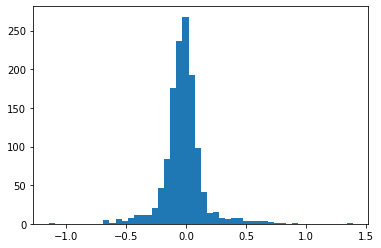

In [95]:
plt.hist(y_true-y_pred.reshape(-1), bins=50)

In [96]:
np.mean(y_true-y_pred.reshape(-1))

-0.02372638233459814

In [99]:
np.var(y_true-y_pred.reshape(-1))

0.02907425197628409

In [100]:
0.02907425197628409**2

0.0008453121279804593